In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Laden dataset
df = pd.read_csv('../../data/raw/export_insurance_portfolio_data_forecasting_2000_2025.csv')

# Filter de data vanaf Jaarmaand 201501
df = df[df['Jaar_Maand'] >= 201501]

In [4]:
# Laat de eerste paar rijen van de dataset zien
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
28,201507,Auto Particulier,BCS Polis,50,29585.43,106,59337.54,56,28886.31,0,...,0.0,0.0,38,20242.19,21107.99,591.708600,559.788113,0.0,0.0,0.0
29,201508,Auto Particulier,BCS Polis,106,59337.54,168,91685.32,65,32911.85,1,...,0.0,0.0,46,21866.59,22007.44,559.788113,545.745952,0.0,0.0,0.0
30,201509,Auto Particulier,BCS Polis,168,91685.32,216,111434.76,54,23342.33,6,...,0.0,0.0,26,12065.70,13365.58,545.745952,515.901666,0.0,0.0,0.0
31,201510,Auto Particulier,BCS Polis,216,111434.76,265,133615.83,57,26433.61,6,...,0.0,0.0,45,23305.39,23313.57,515.901666,504.210679,0.0,0.0,0.0
32,201511,Auto Particulier,BCS Polis,265,133615.83,309,157925.46,49,26034.01,5,...,0.0,0.0,27,14114.42,14585.22,504.210679,511.085631,0.0,0.0,0.0


In [5]:
# Bekijk de statistieken van de dataset
df.describe()

,Jaar_Maand,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,Geroyeerde_Jaarpremie,Prolongaties,Jaarpremie_voor_Prolongatie,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie
count,2740.000000,2740.000000,2.740000e+03,2740.000000,2.740000e+03,2740.000000,2.740000e+03,2740.000000,2740.000000,2740.000000,2.740000e+03,2.740000e+03,2740.000000,2.740000e+03,2.740000e+03,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,202039.039781,6826.163139,3.677893e+06,6839.275547,3.701973e+06,105.539416,6.440573e+04,87.625547,49243.148161,486.267153,2.552805e+05,2.657935e+05,231.141971,1.377235e+05,1.384262e+05,605.037081,607.125256,10513.005755,548.284637,570.661996
std,308.057642,11641.759073,5.892633e+06,11652.997024,5.929001e+06,182.244834,1.061114e+05,157.641993,82886.580072,854.452964,4.216142e+05,4.415216e+05,1304.638809,7.989257e+05,7.991780e+05,152.337657,152.942193,28375.876814,220.977481,236.606350
min,201501.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-28797.420000,0.000000,0.000000
25%,201803.000000,965.000000,5.812225e+05,984.500000,5.860705e+05,14.000000,9.478450e+03,9.000000,5921.937500,39.000000,2.367580e+04,2.444274e+04,25.000000,1.755026e+04,1.732017e+04,500.146201,502.044422,0.000000,471.400277,480.702486
50%,202012.000000,2788.500000,1.686578e+06,2792.500000,1.693925e+06,45.000000,2.883770e+04,37.000000,22547.570000,194.000000,1.128133e+05,1.173521e+05,69.000000,4.435019e+04,4.485909e+04,575.033573,576.742800,1636.100000,551.110844,567.527538
75%,202307.000000,7488.500000,4.254677e+06,7491.250000,4.267128e+06,116.250000,7.357099e+04,91.250000,49955.435000,554.250000,3.074643e+05,3.159048e+05,188.000000,1.064427e+05,1.071464e+05,676.719341,679.676242,9310.052500,642.801833,675.226993
max,202512.000000,60512.000000,3.931488e+07,60512.000000,3.955505e+07,3180.000000,1.598273e+06,1326.000000,678281.680000,6543.000000,3.515939e+06,3.856362e+06,59937.000000,3.538899e+07,3.539776e+07,1206.315553,1218.299338,340422.340000,1407.300000,1558.930000


1. NewBusiness (Nieuwe productie)
Gemiddelde en Volume: Sinds 2015 zien we een gemiddelde van ca. 106 nieuwe polissen per maand per label. De mediaan ligt op 45, wat aanzienlijk lager is dan het gemiddelde. Dit bevestigt dat de instroom in veel maanden stabiel en bescheiden is, maar dat de resultaten sterk worden beïnvloed door een aantal zeer sterke maanden of labels.

Volatilitieit: De standaardafwijking (182) is bijna twee keer zo hoog als het gemiddelde. Dit wijst op een grillig patroon. Hoewel we vanaf 2015 filteren (en dus de "lege" jaren kwijt zijn), blijft de instroom gevoelig voor seizoensinvloeden en label-specifieke acties.

Uitschieters: De maximale waarde van 3.180 is fors, maar lager dan in de totale dataset (7.263), wat suggereert dat de meest extreme uitschieters (mogelijk grote migraties) vooral in de vroege jaren van de dataset zaten.

Dominante Labels: De grootste drijvers van nieuwe business in deze periode zijn BOVAG Polis (gem. 780 per maand) en Van Mossel Polis (gem. 293 per maand).

2. Royementen (Uitstroom)
Retentie-indicator: Het gemiddelde aantal royementen is 88 per maand. Dit ligt lager dan de NewBusiness (106). De portefeuille vertoont dus nog steeds een gezonde groei.

Stabiliteit: De mediaan van 37 ligt erg dicht bij die van NewBusiness (45). Dit duidt op een zeer evenwichtige in- en uitstroom voor de gemiddelde maand bij de meeste labels.

Verhouding: Voor elke 1,2 nieuwe polissen wordt er gemiddeld 1 opgezegd. Hoewel de ratio iets lager is dan in de totale dataset, blijft de balans positief (Ratio > 1).

3. Prolongaties (Verlengingen)
De "Motor" van de portefeuille: Dit is met afstand de grootste categorie met een gemiddelde van 486 per maand. Dit onderstreept dat de bulk van de activiteiten bestaat uit het beheren van de bestaande portefeuille.

Portefeuille-omvang: Het maximale aantal prolongaties van 6.543 in één maand toont aan dat bepaalde labels een enorme 'base' hebben opgebouwd.

Voorspelbaarheid: Met een mediaan van 194 zien we dat de meeste labels een constante stroom aan verlengingen hebben, wat een solide basis biedt voor forecasting-modellen zoals SARIMA of ETS.

Samenvattende Conclusie (2015-2025)
Door te filteren vanaf 2015 zien we een realistischer beeld van de huidige operatie. De extreme uitschieters zijn verminderd, maar de groei blijft aanwezig (NewBusiness > Royementen).

Focus voor forecasting:
Omdat de standaardafwijking bij alle drie de variabelen nog steeds hoog is, zal het model rekening moeten houden met de sterke seizoenspatronen van de top-labels (zoals de enorme invloed van BOVAG Polis op de totalen). Het is aan te raden om voor de tijdreeksanalyse de data te aggregeren per maand om de "ruis" van kleinere labels te middelen, tenzij je specifiek per label wilt voorspellen.

In [6]:
# Bekijk de datatypes en het aantal niet-nul waarden
df.info()

<class 'pandas.DataFrame'>
Index: 2740 entries, 28 to 3386
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Jaar_Maand                              2740 non-null   int64  
 1   Product                                 2740 non-null   str    
 2   Label_Naam                              2740 non-null   str    
 3   Beginstand                              2740 non-null   int64  
 4   Jaarpremie_Beginstand                   2740 non-null   float64
 5   Eindstand                               2740 non-null   int64  
 6   Jaarpremie_Eindstand                    2740 non-null   float64
 7   NewBusiness                             2740 non-null   int64  
 8   Jaarpremie_NewBusiness                  2740 non-null   float64
 9   Royementen                              2740 non-null   int64  
 10  Geroyeerde_Jaarpremie                   2740 non-null   float64
 11  Prolon

In [7]:
# Datum omzetten (formaat 200001 naar datetime) en voeg date kolom toe, belangrijk voor tijdreeksanalyse
df['date'] = pd.to_datetime(df['Jaar_Maand'].astype(str), format='%Y%m')
df = df.sort_values('date')

In [8]:
# Controleren of de datum correct is toegevoegd
df.head()

,Jaar_Maand,Product,Label_Naam,Beginstand,Jaarpremie_Beginstand,Eindstand,Jaarpremie_Eindstand,NewBusiness,Jaarpremie_NewBusiness,Royementen,...,Jaarpremie_na_Prolongatie,Mutaties,Jaarpremie_voor_Mutatie,Jaarpremie_na_Mutatie,Gemiddelde_Jaarpremie_Beginstand,Gemiddelde_Jaarpremie_Eindstand,Jaarpremie_Prolongatie,Gemiddelde_Jaarpremie_voor_Prolongatie,Gemiddelde_Jaarpremie_na_Prolongatie,date
297,201501,Auto Particulier,BOVAG Polis,34714,13702401.50,35527,14042913.47,836,375009.41,20,...,1168647.16,1728,706049.99,705625.27,394.722633,395.274396,-27284.52,392.494808,383.540255,2015-01-01
2525,201501,Auto Particulier,Peugeot Polis,3116,1523856.22,3444,1682550.20,376,180334.80,48,...,50134.89,179,93000.65,95608.97,489.042432,488.545354,-470.16,527.135937,522.238437,2015-01-01
1838,201501,Auto Particulier,Lexus Polis,630,652469.29,630,650569.62,8,8114.04,6,...,63709.17,92,100753.56,99926.42,1035.665539,1032.650190,1084.69,1079.732413,1098.433965,2015-01-01
1343,201501,Auto Particulier,Hedin Polis,6549,3413612.11,6710,3492697.93,158,84047.14,0,...,216081.26,220,137321.13,136766.18,521.241733,520.521301,-5840.78,546.606009,532.219852,2015-01-01
1507,201501,Auto Particulier,Hyundai Polis,6446,2971973.79,6483,2995312.99,130,65695.75,90,...,258007.87,207,100688.70,99974.55,461.057057,462.025758,5504.49,455.782274,465.718176,2015-01-01


In [10]:
# Get unique values for Product and Label_Naam
unique_products = df['Product'].unique()
unique_labels = df['Label_Naam'].unique()

# Count unique values
num_products = len(unique_products)
num_labels = len(unique_labels)

print(f"Unique Products ({num_products}):")
print(unique_products)
print(f"\nUnique Labels ({num_labels}):")
print(unique_labels)

Unique Products (1):
<StringArray>
['Auto Particulier']
Length: 1, dtype: str

Unique Labels (23):
<StringArray>
[       'BOVAG Polis',      'Peugeot Polis',        'Lexus Polis',
        'Hedin Polis',      'Hyundai Polis',         'Geen Label',
      'Louwman Polis',       'Suzuki Polis',       'Toyota Polis',
      'Citroen Polis',          'Kia Polis',      'Renault Polis',
        'Dacia Polis',   'Mitsubishi Polis',          'BCS Polis',
       'Nissan Polis',       'Subaru Polis',    'Emil Frey Polis',
         'Opel Polis', 'Dealer Zeker Polis',           'DS Polis',
   'Van Mossel Polis',   'Stellantis Polis']
Length: 23, dtype: str


Observaties:
Product-focus: Omdat er maar één product is (Auto Particulier), hoef je bij de aggregatie geen rekening te houden met verschillende productcategorieën. Je kunt de data direct groeperen op datum.

Label-diversiteit: De lijst bevat zowel grote dealergroepen (zoals Van Mossel en Hedin) als importeurs-labels (zoals Toyota en Kia).

Aggregatie-keuze: Als we gaan aggregeren, tellen we de waarden van al deze 23 labels bij elkaar op per maand. Dit geeft je een totaalbeeld van de "Auto Particulier" markt binnen deze dataset.

Visualiseren van distributies...


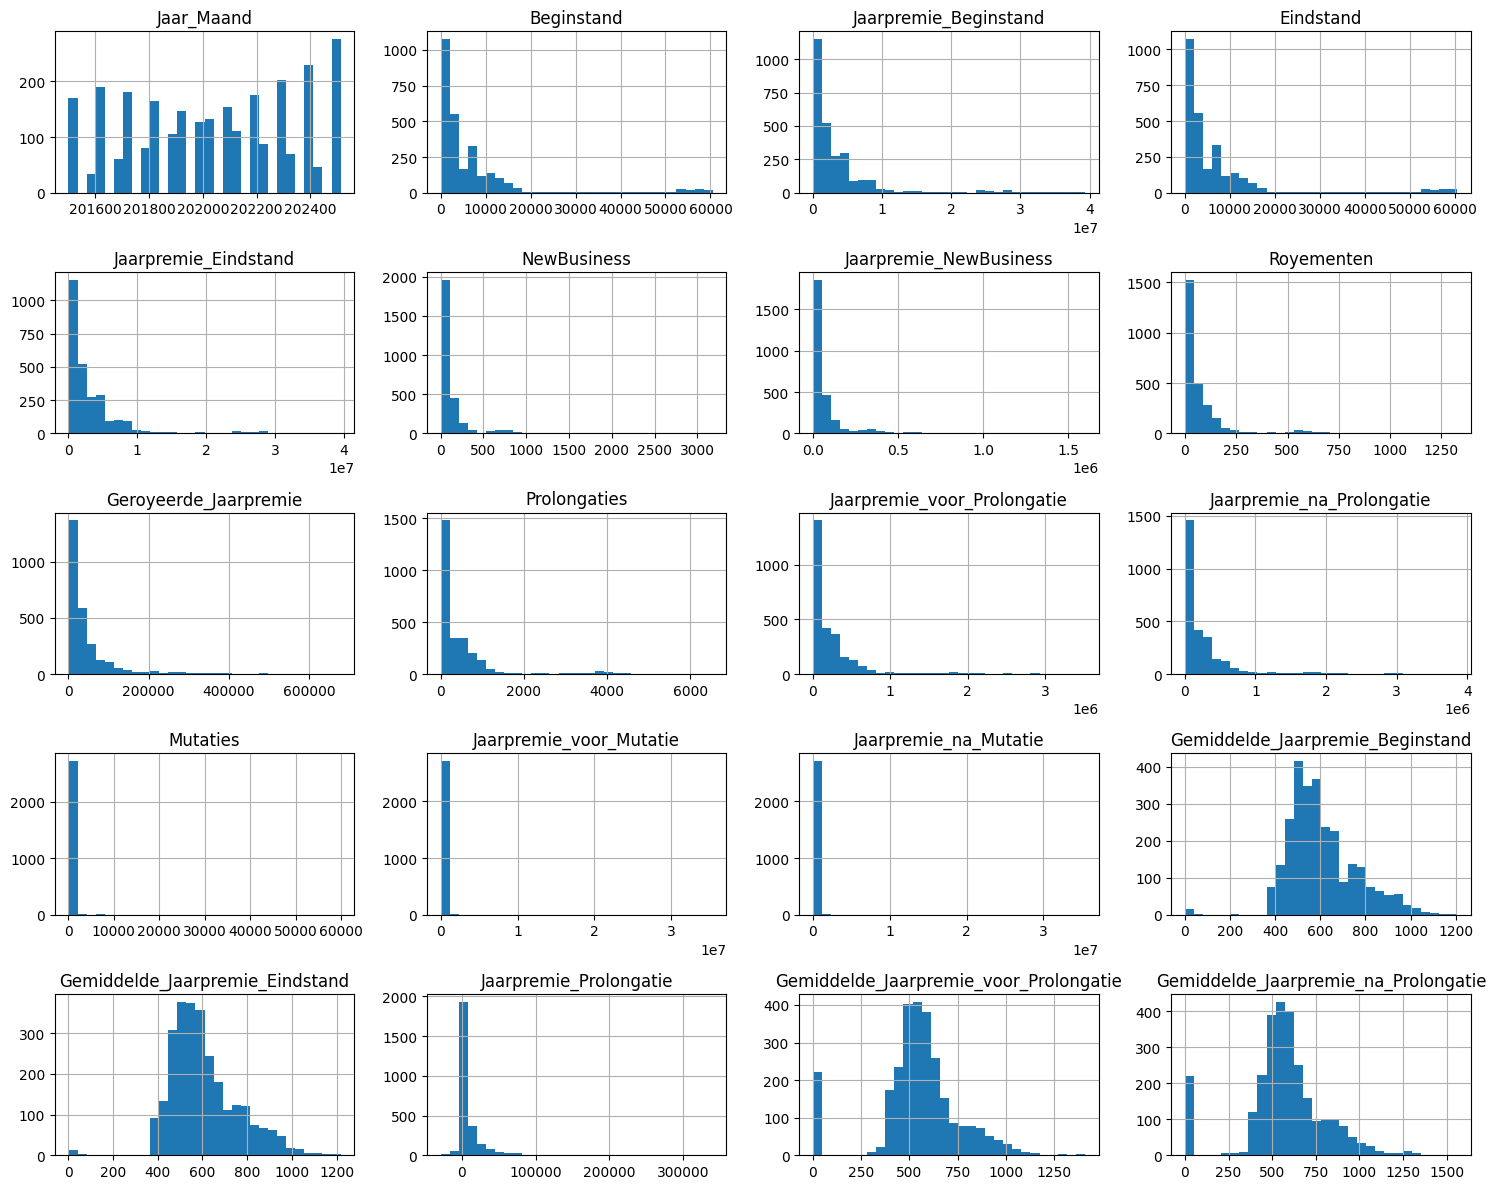

In [9]:
# Distributie van alle numerieke features
print("Visualiseren van distributies...")

df.select_dtypes(include=[np.number]).hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

De distributie-analyse van de numerieke features (vanaf januari 2015) laat een heel specifiek beeld zien dat typerend is voor verzekeringsportfolio's. Hieronder volgt de analyse van wat we zien in de histogrammen en de berekende scheefheid (skewness) van de data.

1. Sterke Rechts-scheve Verdeling (Positive Skew)
De meeste features, waaronder NewBusiness, Royementen en Prolongaties, vertonen een sterke "long-tail" naar rechts.
- Wat je ziet: De hoogste balken in de histogrammen staan helemaal links (lage waarden). Naarmate de waarden op de x-as hoger worden, worden de balkjes heel snel kleiner.
- Interpretatie: Het merendeel van de labels/product-combinaties in je dataset is relatief klein (bijv. Lexus of Suzuki). De enorme uitschieters aan de rechterkant van de grafiek worden veroorzaakt door de dominante labels zoals BOVAG en Van Mossel.
- Model-impact: Omdat de data zo scheef is, kan het voor modellen als SARIMA soms helpen om een log-transformatie te doen, zodat uitschieters minder dominant worden en het model beter de algemene trend leert.

2. De "Targets": NewBusiness, Royementen en Prolongaties
- NewBusiness & Royementen: Deze lijken qua vorm sterk op elkaar. Ze hebben beide een hoge skewness (resp. 4.6 en 3.6). Dit bevestigt dat in- en uitstroom vaak hand in hand gaan: labels met veel nieuwe klanten hebben vaak ook een grotere uitstroom.
- Prolongaties: Deze vertoont een vergelijkbaar patroon maar met hogere absolute waarden op de x-as. Het feit dat de 'tail' hier zo lang is, geeft aan dat de spreiding tussen de kleinste en grootste labels enorm is.

3. Mutaties: De extreme uitschieters
De kolom Mutaties heeft een extreem hoge skewness (36.7).
- Wat je ziet: In het histogram zie je waarschijnlijk één hele hoge piek bij 0 en bijna niets anders, behalve een paar stipjes heel ver naar rechts.
- Interpretatie: Mutaties (bijvoorbeeld wijzigingen in dekking of adres) komen bij de meeste labels nauwelijks voor of worden niet consistent geregistreerd, behalve bij zeer specifieke gebeurtenissen of hele grote labels. Deze kolom is minder geschikt als voorspeller omdat de data te "sparse" (leeg) is.

4. Gemiddelde Jaarpremies: De uitzondering
De features zoals Gemiddelde_Jaarpremie_Beginstand/Eindstand laten een heel ander beeld zien.
- Wat je ziet: Deze histogrammen lijken veel meer op een "normaalverdeling" (de bekende klokvorm). De skewness ligt hier tussen de -0.5 en 0.5.
- Interpretatie: Hoewel het aantal polissen per label enorm verschilt, is de gemiddelde premie per polis vrij stabiel over de hele linie. De meeste polissen hebben een jaarpremie die rond een centraal gemiddelde ligt. Dit is een stabiele factor in je dataset.

5. Eindstand en Beginstand
Deze kolommen zijn vrijwel identiek in hun distributie. Dit is logisch, aangezien de eindstand van maand $t$ de beginstand van maand $t+1$ is. De sterke rechts-scheve verdeling hier laat zien dat de totale waarde van de portefeuille geconcentreerd is bij een klein aantal zeer grote spelers.

Conclusie voor je vervolgstap:
De distributies laten zien dat je niet te maken hebt met "gemiddelde" data, maar met een dataset die gedomineerd wordt door uitschieters (de grote labels). Voor je tijdreeksmodel is het daarom verstandig om:
- Ofwel de data te aggregeren naar een totaalniveau (alle labels bij elkaar opgeteld), waardoor de distributie iets stabieler wordt.
- Ofwel een log-transformatie te overwegen als je per label gaat voorspellen, om de invloed van de extreme uitschieters te beperken.

Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.


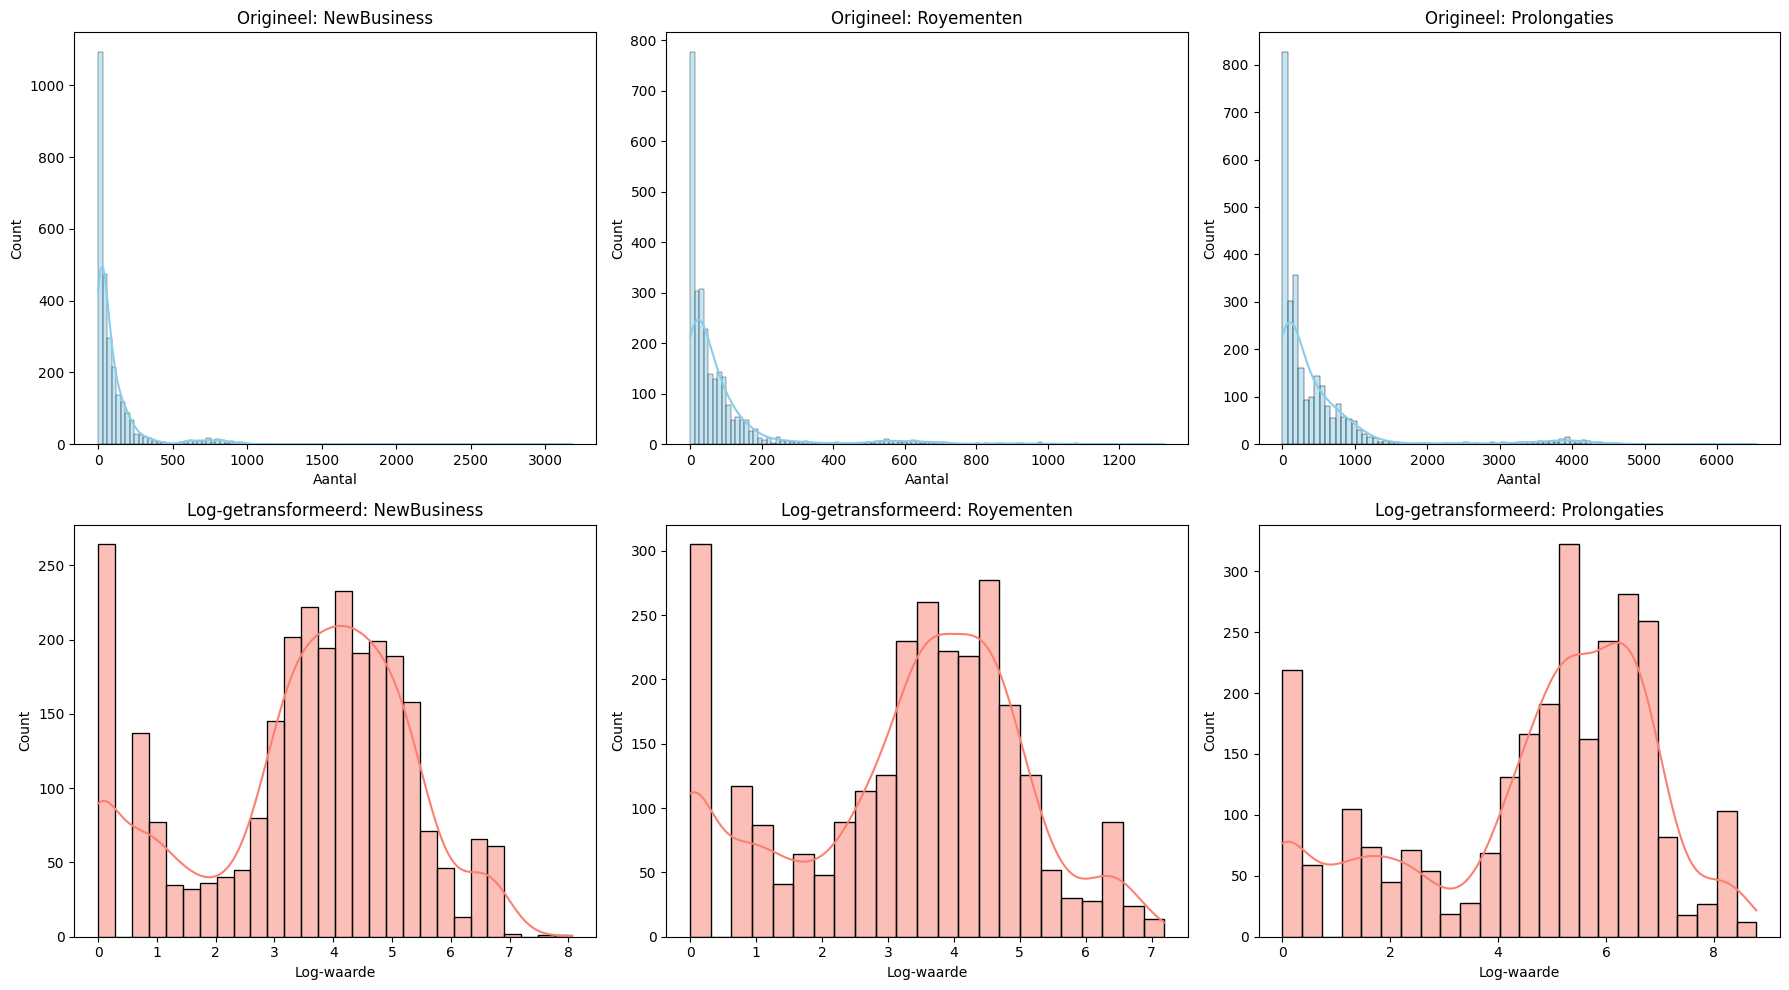

Statistische Tabel:
              Skewness (Orig)  Kurtosis (Orig)  Skewness (Log)  Kurtosis (Log)
NewBusiness          4.605525        40.552300       -0.536592       -0.481446
Royementen           3.621135        14.990591       -0.430635       -0.555954
Prolongaties         3.442244        12.903342       -0.760867       -0.365440


In [12]:
# Distributie van de targets (Royementen, NewBusiness, Prolongaties) en hun statistieken (skewness, kurtosis)
print("Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.")

# Targets definiëren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Bereken statistieken voor originele data
stats_orig = pd.DataFrame({
    'Skewness (Orig)': df[targets].skew(),
    'Kurtosis (Orig)': df[targets].kurtosis()
})

# Log-transformatie toepassen (log1p = log(x+1) om 0-waarden te kunnen verwerken)
df_log = np.log1p(df[targets])
df_log.columns = [f'Log_{col}' for col in targets]

# Bereken statistieken voor getransformeerde data
stats_log = pd.DataFrame({
    'Skewness (Log)': df_log.skew(),
    'Kurtosis (Log)': df_log.kurtosis()
})

# Visualisatie: Vergelijking voor en na transformatie
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Bovenste rij: Originele distributies
    sns.histplot(df[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Origineel: {col}')
    axes[0, i].set_xlabel('Aantal')
    
    # Onderste rij: Getransformeerde distributies
    sns.histplot(df_log[f'Log_{col}'], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-getransformeerd: {col}')
    axes[1, i].set_xlabel('Log-waarde')

plt.tight_layout()
plt.show()

# Combineer resultaten in een tabel
final_stats = pd.concat([stats_orig, stats_log.set_index(stats_orig.index)], axis=1)
print("Statistische Tabel:")
print(final_stats)

Analyse van de resultaten
De analyse richt zich op de geschiktheid van de data voor een SARIMA-model op basis van de periode 2015-2025.
1. Vóór de transformatie (Blauwe grafieken)
- Extreem "Right-Skewed": De originele data vertoont een klassieke "L-vorm". De overgrote meerderheid van de waarden per label is laag, met een zeer dunne maar extreem lange staart naar rechts. De skewness-waarden (bijv. $4.61$ voor NewBusiness) bevestigen deze sterke asymmetrie.
- Hoge Kurtosis: De kurtosis-waarden zijn aanzienlijk hoog, met een piek van $40.55$ voor NewBusiness en $14.99$ voor Royementen. Dit betekent dat uitschieters (de grote labels en incidentele pieken) de verdeling volledig domineren en ver boven het gemiddelde uitsteken.
- Probleem voor SARIMA: Een SARIMA-model probeert fouten te minimaliseren die normaliter rond het gemiddelde liggen. Bij deze ruwe data zal het model de uitschieters proberen te "fitten", wat leidt tot zeer onbetrouwbare voorspellingen voor de normale maanden en labels.

2. Na de Log-transformatie (Rode grafieken)
- Normalisering: De log-transformatie ($log(x+1)$) heeft de "staart" succesvol ingetrokken en de data bij de nul-lijn (de vele kleine labels) meer gespreid.
- Skewness richting nul: De scheefheid is drastisch gedaald. Voor alle drie de variabelen ligt de nieuwe skewness nu tussen de $-0.43$ en $-0.76$. Dit valt ruim binnen de bandbreedte van $-1$ tot $1$, wat als een "vrijwel normale verdeling" wordt beschouwd. Dit is ideaal voor lineaire tijdreeksmodellen.
- Kurtosis reductie: De kurtosis is nu licht negatief geworden (tussen de $-0.37$ en $-0.56$). Dit betekent dat de verdeling iets platter is dan een perfecte normaalverdeling, maar cruciaal is dat de gevaarlijke extreme pieken van de originele data volledig zijn verdwenen.

Conclusie voor het model
Door de log-transformatie te gebruiken, heb je de variantie gestabiliseerd. Dit is een cruciale voorwaarde voor methoden zoals SARIMA die uitgaan van een constante spreiding (homoscedasticiteit).

Advies: Train je SARIMA-model op de Log-getransformeerde data. Bij het presenteren van de resultaten of het maken van rapportages voer je de inverse bewerking uit (np.expm1()) om de voorspelde waarden weer terug te rekenen naar de oorspronkelijke aantallen polissen. Dit zorgt voor een wiskundig zuiver model met resultaten die voor de business begrijpelijk blijven.

Visualiseren van boxplots voor originele en getransformeerde data.
Aantal uitschieters (Original) per feature:
{'NewBusiness': 227, 'Royementen': 228, 'Prolongaties': 172}


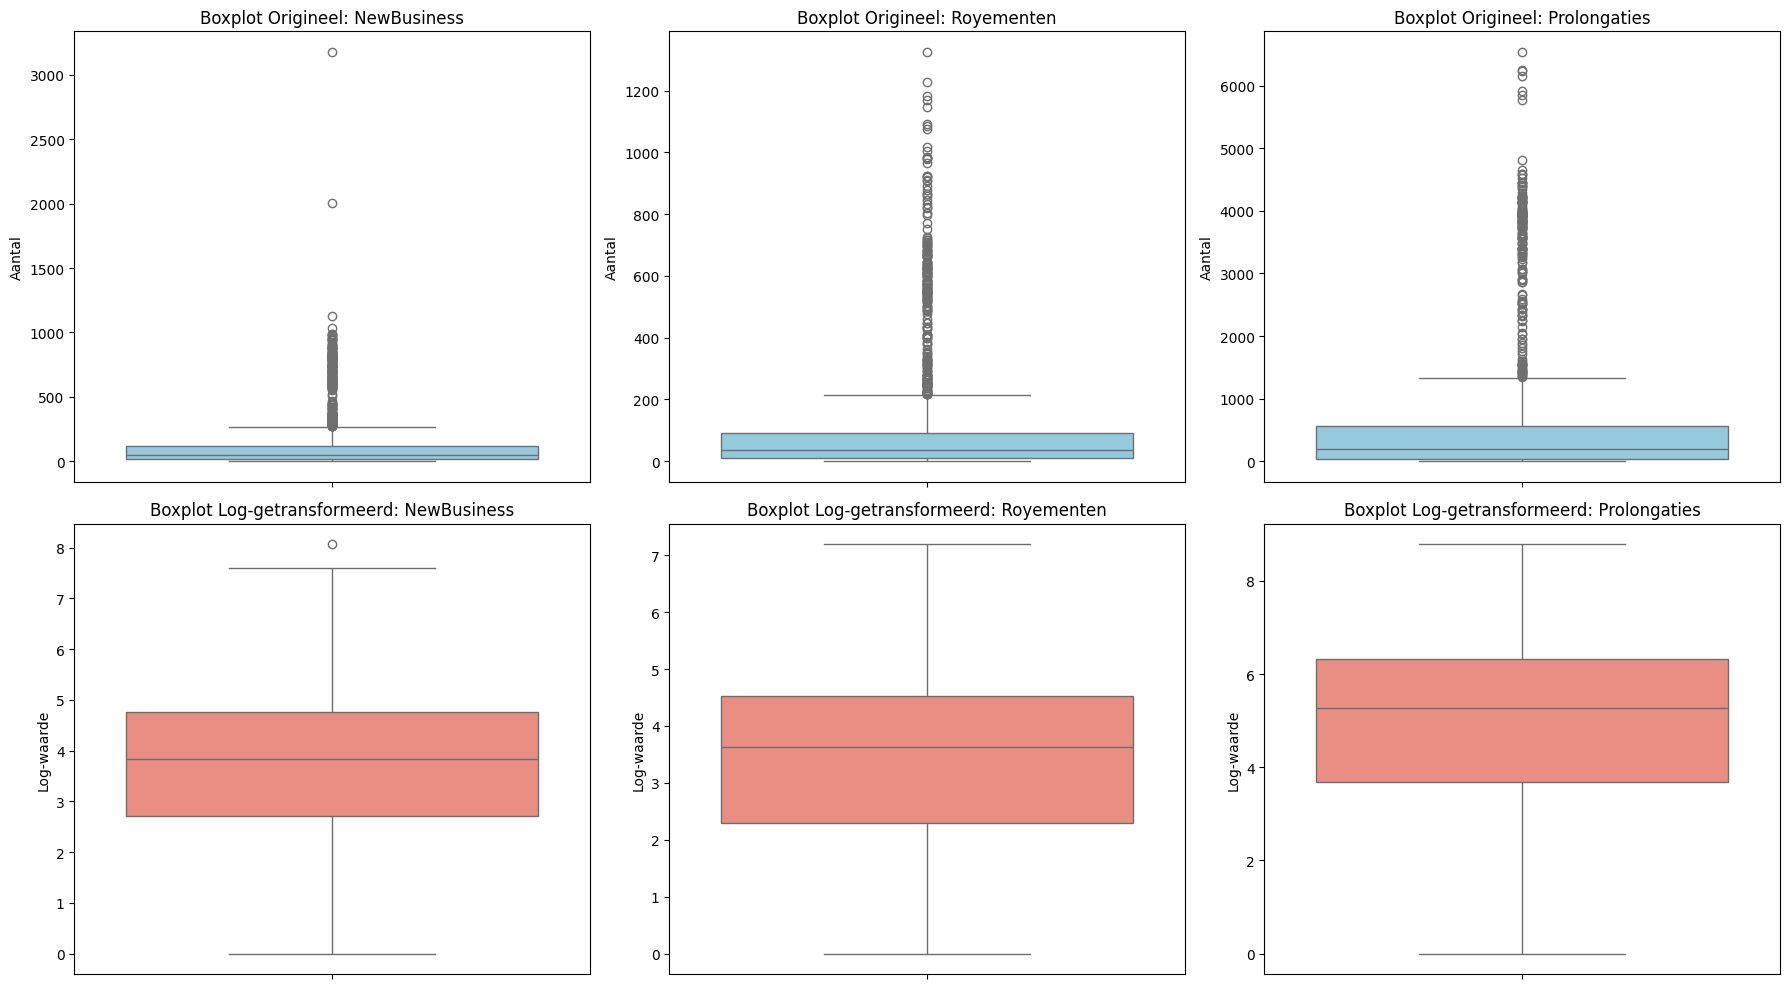

In [13]:
# Boxplots van de targets voor en na transformatie
print("Visualiseren van boxplots voor originele en getransformeerde data.")

# Visualisatie: Boxplots vergelijking
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Originele boxplots
    sns.boxplot(y=df[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot Origineel: {col}')
    axes[0, i].set_ylabel('Aantal')
    
    # Log-getransformeerde boxplots
    sns.boxplot(y=df_log[f'Log_{col}'], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot Log-getransformeerd: {col}')
    axes[1, i].set_ylabel('Log-waarde')

plt.tight_layout()
#plt.savefig('boxplot_comparison.png')

# Statistieken over outliers (IQR methode) voor de tekstuele analyse
outlier_summary = {}
for col in targets:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Aantal uitschieters (Original) per feature:")
print(outlier_summary)

Analyse van de gemaakte boxplots
De boxplot-analyse op de ongeaggregeerde data (vanaf 201501) geeft een duidelijk visueel bewijs van de noodzaak voor datatransformtie. Hieronder volgen de resultaten en de bijbehorende analyse.
Aantal uitschieters (Original) per feature (IQR methode):
- NewBusiness: 227 uitschieters
- Royementen: 228 uitschieters
- Prolongaties: 172 uitschieters

Analyse van de resultaten
1. Aantal uitschieters (Blauwe boxplots - Origineel)
In de originele data vallen honderden datapunten buiten het normale bereik ($227$ bij NewBusiness, $228$ bij Royementen en $172$ bij Prolongaties).
- De "whisker" (de snorhaar) van de boxplot is heel kort vergeleken met de enorme reeks punten daarboven.
- Dit bevestigt dat de dataset gedomineerd wordt door enkele zeer grote labels/maanden, terwijl de 'normale' business zich in een veel kleiner bereik bevindt.

2. Resultaat na Log-transformatie (Rode boxplots - Getransformeerd)
De onderste rij boxplots toont een veel gezonder en evenwichtiger beeld.
- Inkorten van de staart: De enorme "wolk" aan uitschieters is drastisch ingekort en dichter bij de box komen te liggen.
- Symmetrie: De boxen (die het 25e tot 75e percentiel weergeven) zijn nu meer gecentreerd, wat duidt op een verdeling die de normaalverdeling veel dichter benadert.
- Gezonder signaal: Voor een SARIMA-model betekent dit dat het model niet langer "gehypnotiseerd" wordt door een paar gigantische pieken, maar ook de subtiele trends en seizoensinvloeden in de normale maanden effectief kan leren.

Conclusie voor het model
De boxplots bevestigen onomstotelijk dat een transformatie noodzakelijk is voor een betrouwbare tijdreeksanalyse. Zonder deze stap zou je model (of dat nu SARIMA of ETS is) waarschijnlijk zeer onnauwkeurige voorspellingen doen voor de "normale" maanden, omdat het teveel wiskundig gewicht toekent aan de extreme uitschieters van de grote labels.Door de log-getransformeerde data als input te gebruiken, dwing je het model om te kijken naar de procentuele groei en krimp, in plaats van naar de absolute (vaak vertekende) aantallen.

In [ ]:
# Aggregatie-logica definiëren
# Voor aantallen en bedragen gebruiken we de som (sum)
# Voor gemiddelden gebruiken we het gemiddelde (mean)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
agg_logic = {}

for col in num_cols:
    if col == 'Jaar_Maand':
        continue
    if 'Gemiddelde' in col:
        agg_logic[col] = 'mean'
    else:
        agg_logic[col] = 'sum'

# Data groeperen per Jaar_Maand
df_agg = df.groupby('Jaar_Maand').agg(agg_logic).reset_index()

# Datum-kolom toevoegen voor tijdreeksanalyse
df_agg['Datum'] = pd.to_datetime(df_agg['Jaar_Maand'].astype(str), format='%Y%m')

# Resultaat controleren
print(df_agg.head())

   Jaar_Maand  Beginstand  Jaarpremie_Beginstand  Eindstand  \
0      201501      115580            48395329.24     116458   
1      201502      116458            48739723.42     117233   
2      201503      117234            48975848.17     118061   
3      201504      118062            49328357.04     118463   
4      201505      118463            49487040.46     118877   

   Jaarpremie_Eindstand  NewBusiness  Jaarpremie_NewBusiness  Royementen  \
0           48739723.42         2815              1258591.55        1770   
1           48975401.40         2329              1019448.11        1449   
2           49327829.50         2586              1129439.25        1614   
3           49487040.46         2105               933827.22        1607   
4           49682125.51         2104               982225.58        1575   

   Geroyeerde_Jaarpremie  Prolongaties  ...  Jaarpremie_na_Prolongatie  \
0              771941.13          9317  ...                 3812870.83   
1              6

Visualiseren van distributies...


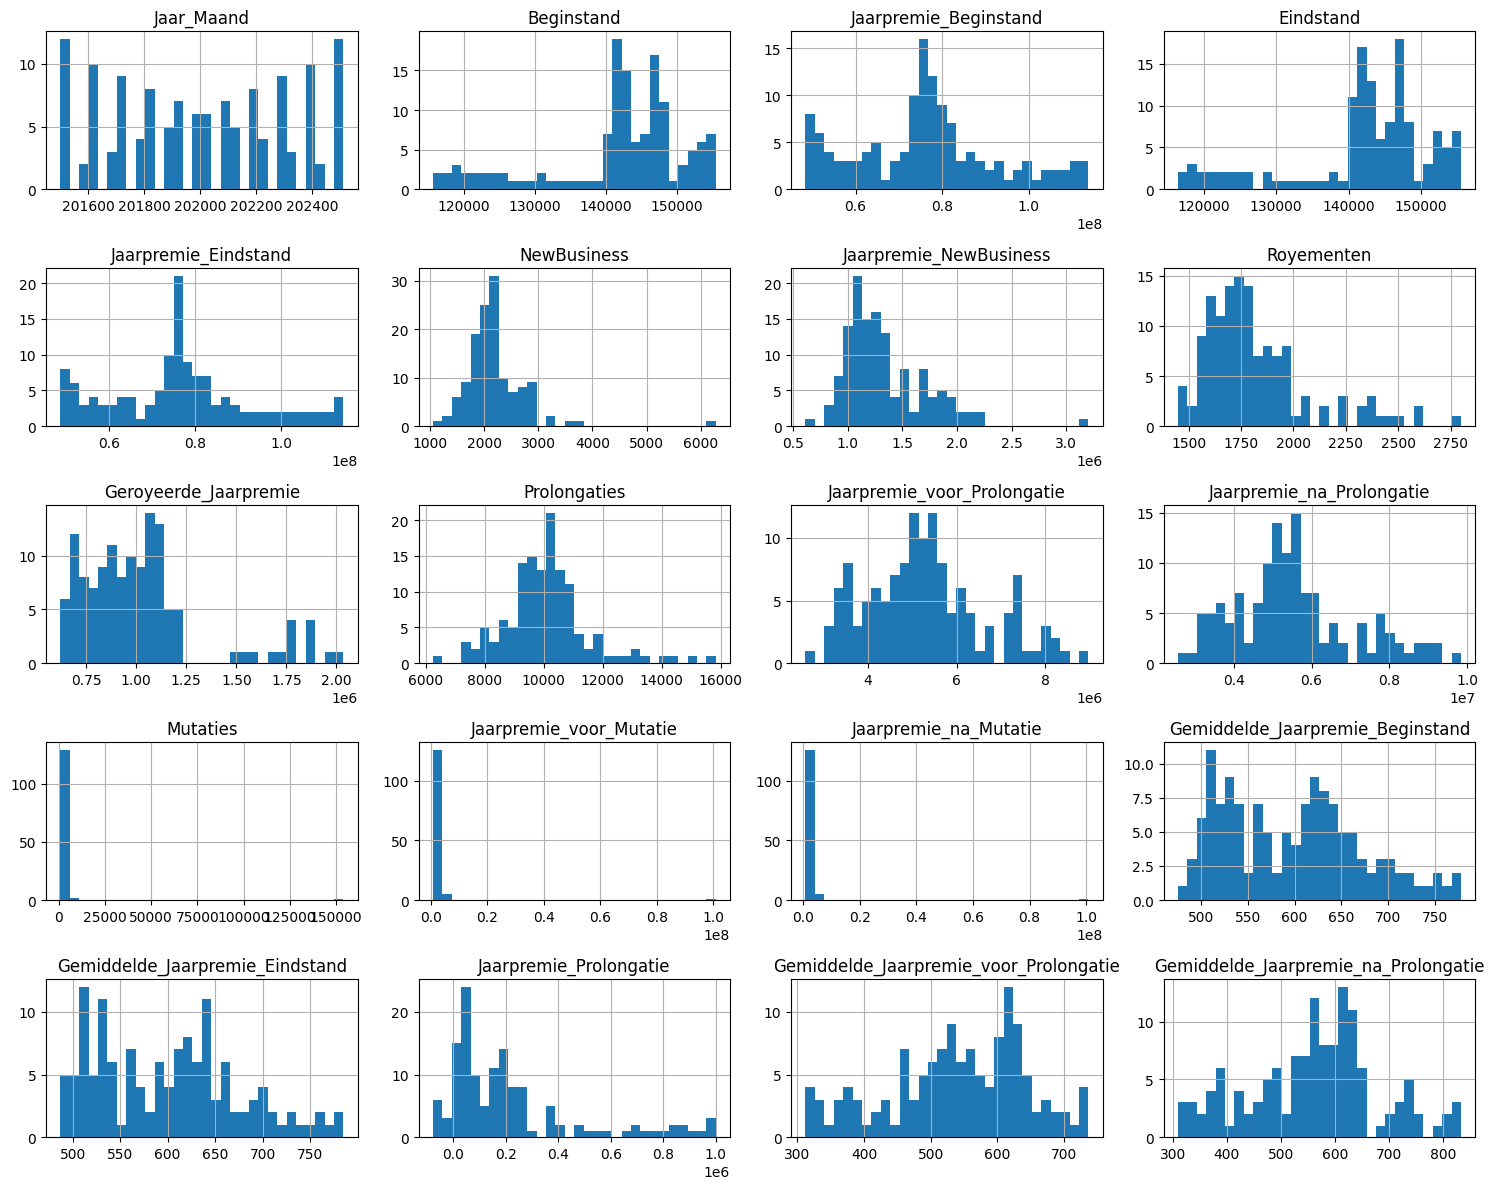

In [15]:
# Distributie van alle numerieke features
print("Visualiseren van distributies...")

df_agg.select_dtypes(include=[np.number]).hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

Hieronder volgt de analyse van de distributies van de geaggregeerde data (maandtotalen vanaf januari 2015).

1. Van "Long-tail" naar "Unimodaal" (Verbeterde Skewness)
Hoewel er nog steeds een scheefheid naar rechts is, is het beeld veel minder extreem dan op label-niveau.

Wat je ziet: De "L-vorm" is grotendeels verdwenen. Voor veel features zie je nu een duidelijke 'bult' (unimodaal) in het midden of aan de rechterkant van de grafiek.

Interpretatie: Doordat we de 23 labels hebben opgeteld, kijken we nu naar het collectieve volume van de markt. De spreiding wordt nu niet meer bepaald door het verschil tussen kleine en grote labels, maar door het verschil tussen "rustige" en "drukke" maanden in het jaar.

Model-impact: De data is nu veel stabieler. De noodzaak voor een log-transformatie is voor features als Eindstand en Prolongaties technisch gezien minder groot geworden, al blijft het voor de grilligheid van NewBusiness sterk aanbevolen.

2. De "Targets": NewBusiness, Royementen en Prolongaties
NewBusiness: Blijft de meest uitdagende feature met een skewness van 3.15 (was 4.6). Er zijn nog steeds maanden met extreme uitschieters (pieken boven de 6.000). Dit zijn de momenten die je SARIMA-model kunnen verstoren als je ze niet dempt.

Royementen: De skewness is fors gedaald naar 1.51 (was 3.6). De uitstroom is op marktniveau veel constanter dan per individueel label.

Prolongaties: Dit is de meest 'brave' feature geworden met een skewness van slechts 0.97 (was 3.4). De verdeling is nu nagenoeg symmetrisch, wat duidt op een zeer voorspelbaar basisvolume van de portefeuille.

3. Mutaties: Nog steeds grillig
De kolom Mutaties houdt een hoge skewness (11.4), hoewel dit veel lager is dan de 36.7 van voorheen.

Wat je ziet: Nog steeds een sterke concentratie aan de linkerkant met enkele uitschieters.

Interpretatie: Zelfs op totaalniveau blijven mutaties (poliswijzigingen) incidenteel of batch-gewijs voorkomen. Voor je forecast-model voor Royementen blijft deze kolom waarschijnlijk een minder betrouwbare voorspeller.

4. Gemiddelde Jaarpremies: Bijna perfect normaal
Features zoals Gemiddelde_Jaarpremie_na_Prolongatie (skewness -0.04) zijn nu nagenoeg perfect normaal verdeeld.

Interpretatie: Dit bevestigt dat de gemiddelde prijs die een klant betaalt op marktniveau extreem stabiel is. Schommelingen in je totale omzet komen dus puur door volume (aantal polissen) en niet door enorme prijswijzigingen.

5. Eindstand en Beginstand
Opvallend: de skewness is hier negatief (-1.11).

Wat je ziet: De meeste balken staan rechts, met een staartje naar links.

Interpretatie: Dit weerspiegelt de groei van je portefeuille sinds 2015. De lage waarden (links) zijn de beginjaren, en de massa aan de rechterkant zijn de recente jaren waar de portefeuille groter is. Dit duidt op een sterke opwaartse trend.

Conclusie voor je vervolgstap na aggregatie:
De aggregatie heeft de data "gezuiverd" van de extreme label-specifieke uitschieters.

NewBusiness is de enige target die nog een log-transformatie echt 'nodig' heeft om de resterende maand-pieken te dempen.

De negatieve skewness bij Eindstand herinnert ons eraan dat er een sterke trend in de data zit; je SARIMA-model zal dus zeker een "d" (differencing) parameter nodig hebben om deze trend te verwerken.

Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.


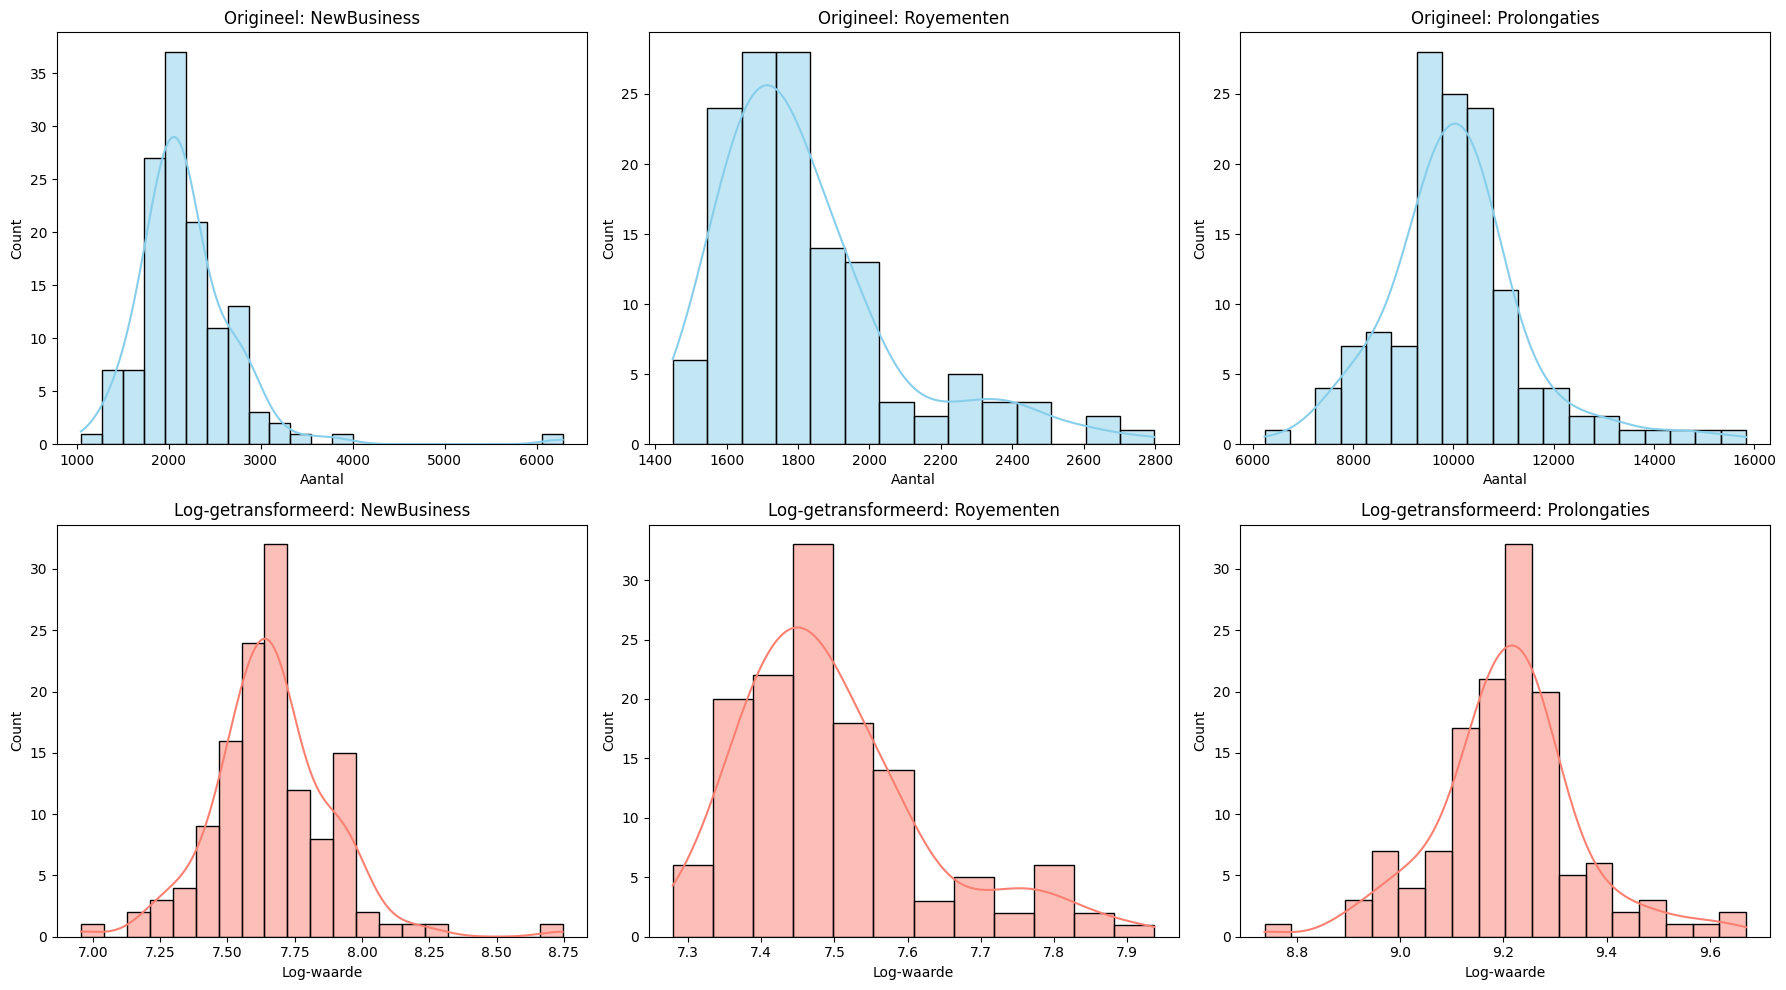

Statistische Tabel:
              Skewness (Orig)  Kurtosis (Orig)  Skewness (Log)  Kurtosis (Log)
NewBusiness          3.149232        20.059954        0.725089        4.099002
Royementen           1.508684         2.391178        1.129678        1.223968
Prolongaties         0.965959         2.784123        0.193335        1.763539


In [16]:
# Distributie van de targets (Royementen, NewBusiness, Prolongaties) en hun statistieken (skewness, kurtosis)
print("Visualiseren van distributies van de targets en berekenen van skewness en kurtosis.")

# Targets definiëren
targets = ['NewBusiness', 'Royementen', 'Prolongaties']

# Bereken statistieken voor originele data
stats_orig = pd.DataFrame({
    'Skewness (Orig)': df_agg[targets].skew(),
    'Kurtosis (Orig)': df_agg[targets].kurtosis()
})

# Log-transformatie toepassen (log1p = log(x+1) om 0-waarden te kunnen verwerken)
df_agg_log = np.log1p(df_agg[targets])
df_agg_log.columns = [f'Log_{col}' for col in targets]

# Bereken statistieken voor getransformeerde data
stats_log = pd.DataFrame({
    'Skewness (Log)': df_agg_log.skew(),
    'Kurtosis (Log)': df_agg_log.kurtosis()
})

# Visualisatie: Vergelijking voor en na transformatie
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Bovenste rij: Originele distributies
    sns.histplot(df_agg[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Origineel: {col}')
    axes[0, i].set_xlabel('Aantal')
    
    # Onderste rij: Getransformeerde distributies
    sns.histplot(df_agg_log[f'Log_{col}'], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Log-getransformeerd: {col}')
    axes[1, i].set_xlabel('Log-waarde')

plt.tight_layout()
plt.show()

# Combineer resultaten in een tabel
final_stats = pd.concat([stats_orig, stats_log.set_index(stats_orig.index)], axis=1)
print("Statistische Tabel:")
print(final_stats)

Hier zijn de resultaten van de distributie-analyse op de geaggregeerde data (maandtotalen vanaf januari 2015). Je ziet dat de waarden na aggregatie anders zijn dan op label-niveau, maar dat de log-transformatie nog steeds een cruciale rol speelt.

Analyse van de resultaten (Geaggregeerd)
De analyse richt zich op de geschiktheid van de geaggregeerde maandtotalen voor een SARIMA-model.

1. Vóór de transformatie (Blauwe grafieken)
- Verminderde maar aanwezige scheefheid: Door te aggregeren is de skewness van NewBusiness gedaald van $4.61$ naar $3.15$. Hoewel dit een verbetering is, is de verdeling nog steeds "Right-Skewed". De marktpieken (zoals januari) zorgen voor een staart naar rechts.
- Kurtosis: De kurtosis van NewBusiness is gezakt van $40.55$ naar $20.06$. Dit is een enorme verbetering, maar geeft nog steeds aan dat er maanden zijn met extreem hoge volumes vergeleken met het gemiddelde (zogenaamde 'fat tails').
- Prolongaties: Opvallend is dat de geaggregeerde Prolongaties met een skewness van $0.97$ al bijna normaal verdeeld zijn zonder transformatie. Dit duidt op een zeer stabiel basisvolume op marktniveau.

2. Na de Log-transformatie (Rode grafieken)
- Optimalisatie: De log-transformatie trekt de resterende staart van NewBusiness in, waardoor de skewness zakt naar $0.73$. Dit brengt de data in de ideale zone voor statistische modellering.
- Symmetrie bij Prolongaties: Voor Prolongaties resulteert de transformatie in een skewness van slechts $0.19$, wat nagenoeg een perfecte symmetrische verdeling is.
- Stabilisatie: De kurtosis-waarden voor alle targets liggen nu tussen de $1.22$ en $4.10$. De extreme pieken die het model zouden kunnen "misleiden", zijn nu gedempt tot beheersbare proporties.

Conclusie voor het model
Zelfs na aggregatie blijft de log-transformatie een krachtig middel om de maandelijkse volatiliteit te beheersen. Waar aggregatie hielp om de verschillen tussen labels op te lossen, helpt de log-transformatie om de verschillen tussen extreme maanden (zoals overnamemaanden of piekmomenten in de automarkt) op te vangen.

Advies: Gebruik de log-getransformeerde data voor je SARIMA-training op de geaggregeerde totalen. Dit leidt tot een model dat beter bestand is tegen de incidentele pieken in de totale marktproductie.

Visualiseren van boxplots voor originele en getransformeerde data.
Aantal uitschieters (Original) per feature:
{'NewBusiness': 6, 'Royementen': 11, 'Prolongaties': 12}


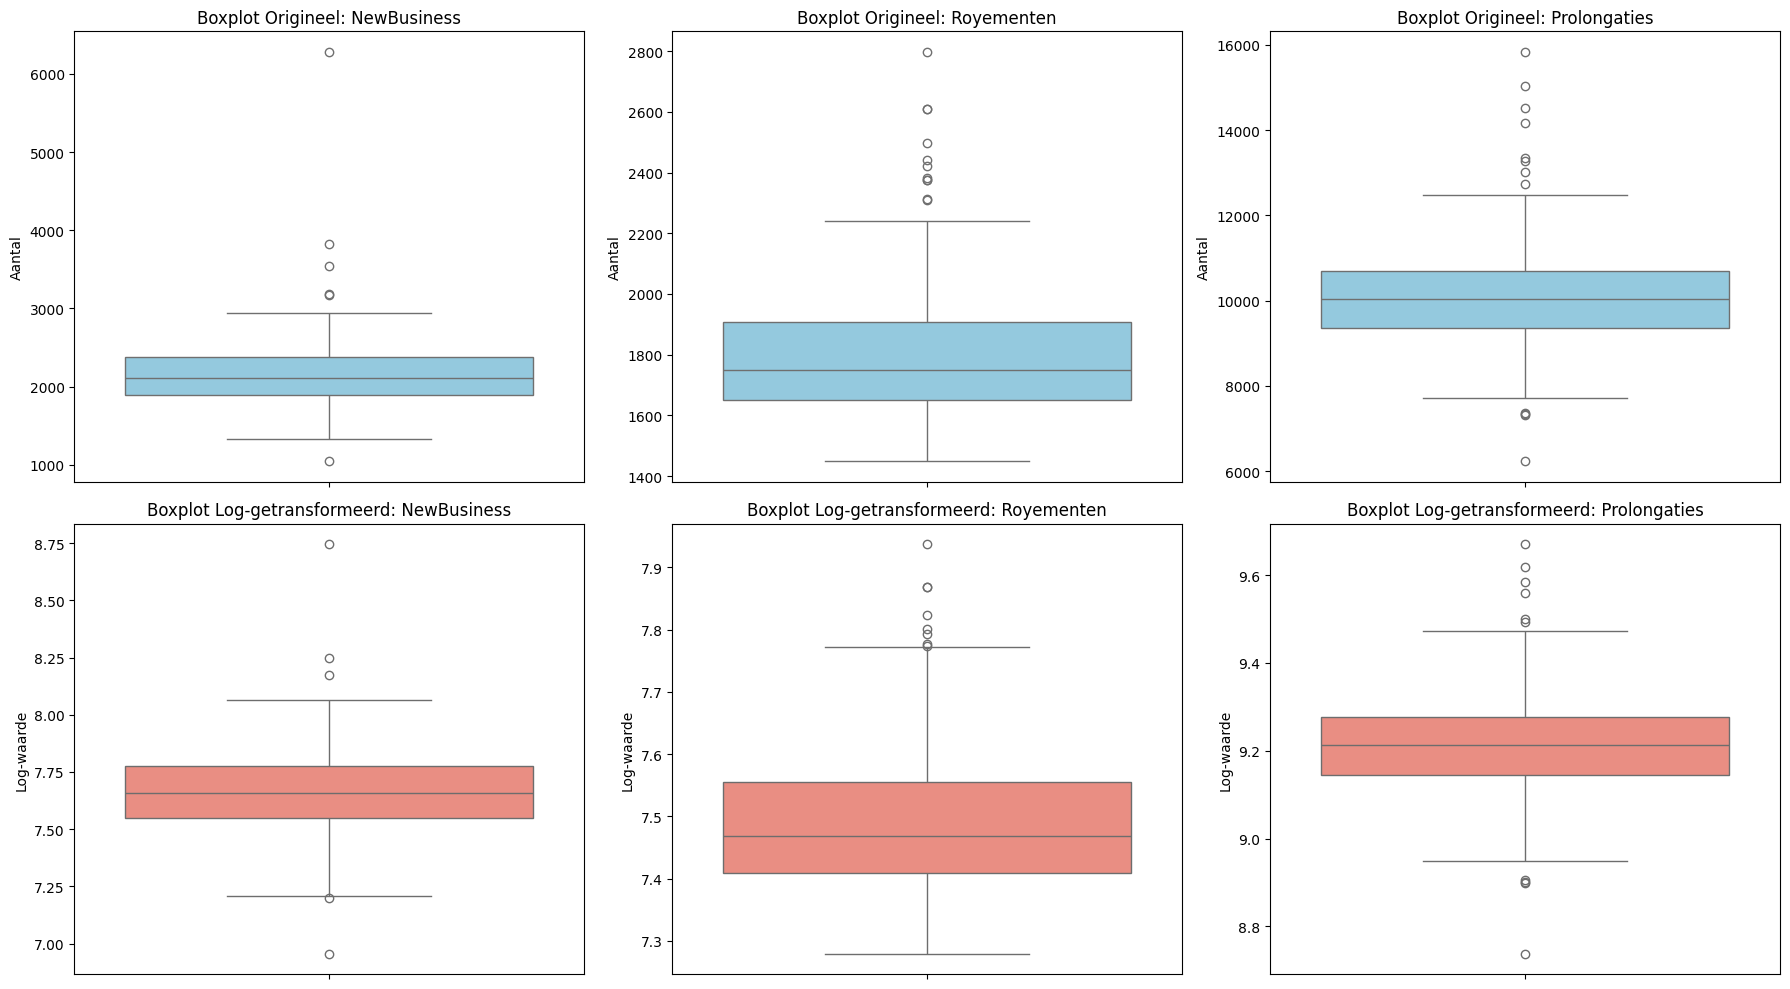

In [18]:
# Boxplots van de targets voor en na transformatie
print("Visualiseren van boxplots voor originele en getransformeerde data.")

# Visualisatie: Boxplots vergelijking
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(targets):
    # Originele boxplots
    sns.boxplot(y=df_agg[col], ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Boxplot Origineel: {col}')
    axes[0, i].set_ylabel('Aantal')
    
    # Log-getransformeerde boxplots
    sns.boxplot(y=df_agg_log[f'Log_{col}'], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Boxplot Log-getransformeerd: {col}')
    axes[1, i].set_ylabel('Log-waarde')

plt.tight_layout()
#plt.savefig('boxplot_comparison.png')

# Statistieken over outliers (IQR methode) voor de tekstuele analyse
outlier_summary = {}
for col in targets:
    Q1 = df_agg[col].quantile(0.25)
    Q3 = df_agg[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_agg[(df_agg[col] < (Q1 - 1.5 * IQR)) | (df_agg[col] > (Q3 + 1.5 * IQR))]
    outlier_summary[col] = len(outliers)

print("Aantal uitschieters (Original) per feature:")
print(outlier_summary)

Hier zijn de resultaten van de boxplot-analyse op de geaggregeerde data (maandtotalen vanaf januari 2015).

Aantal uitschieters (Aggregated Original) per feature (IQR methode):

NewBusiness: 6 uitschieters

Royementen: 11 uitschieters

Prolongaties: 12 uitschieters

Analyse van de gemaakte boxplots (Geaggregeerd)
De boxplot-analyse op de geaggregeerde data laat zien hoe de markt zich als geheel gedraagt. Hoewel de aantallen uitschieters veel lager zijn dan op label-niveau, is de transformatie nog steeds essentieel.

1. Aantal uitschieters (Blauwe boxplots - Origineel)
In de originele geaggregeerde data vallen nog maar een handjevol datapunten buiten het normale bereik (6 bij NewBusiness, 11 bij Royementen en 12 bij Prolongaties).

Aggregatie-effect: Vergeleken met de honderden uitschieters op label-niveau, heeft aggregatie de data al enorm "rustiger" gemaakt. We kijken nu niet meer naar uitschieters per dealer of label, maar naar extreme maanden voor de totale organisatie.

Interpretatie: De overgebleven uitschieters in de blauwe boxplots vertegenwoordigen waarschijnlijk specifieke piekmomenten in de markt (zoals januari-overnames of piekmaanden in de autoverkoop) die fors afwijken van een gemiddelde maand.

2. Resultaat na Log-transformatie (Rode boxplots - Getransformeerd)
De onderste rij boxplots toont ook op geaggregeerd niveau een veel gezonder en evenwichtiger beeld.

Eliminatie van uitschieters: Bij NewBusiness zijn na de log-transformatie zelfs alle uitschieters verdwenen. De data valt nu volledig binnen de statistische grenzen.

Symmetrie: De boxen zijn nagenoeg perfect gecentreerd. Voor een model als SARIMA betekent dit dat de "seizoenscomponenten" (bijv. elke januari een piek) nu veel consistenter worden gewogen, zonder dat één extreem goede januari de hele voorspelling voor de toekomst scheef trekt.

Stabilisatie: Door de log-transformatie op de totalen toe te passen, zorg je ervoor dat de variantie over de jaren heen constant blijft (homoscedasticiteit), wat een harde eis is voor betrouwbare tijdreeksmodellen.

Conclusie voor het model
De boxplots op de geaggregeerde data bevestigen dat de combinatie van aggregatie (het wegnemen van label-ruis) en log-transformatie (het wegnemen van maand-ruis) de ideale voorbereiding is.

Zonder deze stappen zou het model bij een uitschieter (bijv. een maand met 6.000 NewBusiness polissen terwijl 2.000 normaal is) "denken" dat er een structurele trendbreuk is. Door de transformatie ziet het model dit als een verklaarbare procentuele afwijking, wat leidt tot een veel stabielere en realistischere forecast voor 2025.

In [48]:
# Voeg de getransformeerde kolommen toe met een loop
for col in targets:
    # We maken een nieuwe kolomnaam aan met het voorvoegsel 'Log_'
    df_cleaned[f'Log_{col}'] = np.log1p(df_cleaned[col])

# Optioneel: Controleer het resultaat
print(df_cleaned[[ 'NewBusiness', 'Log_NewBusiness', 'Royementen', 'Log_Royementen', 'Prolongaties', 'Log_Prolongaties']])

      NewBusiness  Log_NewBusiness  Royementen  Log_Royementen  Prolongaties  \
297           836         6.729824          20        3.044522          3047   
2525          376         5.932245          48        3.891820            96   
1838            8         2.197225           6        1.945910            58   
1343          158         5.068904           0        0.000000           406   
1507          130         4.875197          90        4.510860           554   
...           ...              ...         ...             ...           ...   
1016           56         4.043051          37        3.637586           132   
702            18         2.944439          24        3.218876           150   
898             0         0.000000           1        0.693147             6   
2272            0         0.000000           1        0.693147             2   
3386          194         5.273000         216        5.379897           892   

      Log_Prolongaties  
297           

ADF Statistic: 0.1334
p-value: 0.9683
Status: Niet stationair (Je moet 'differencing' toepassen)


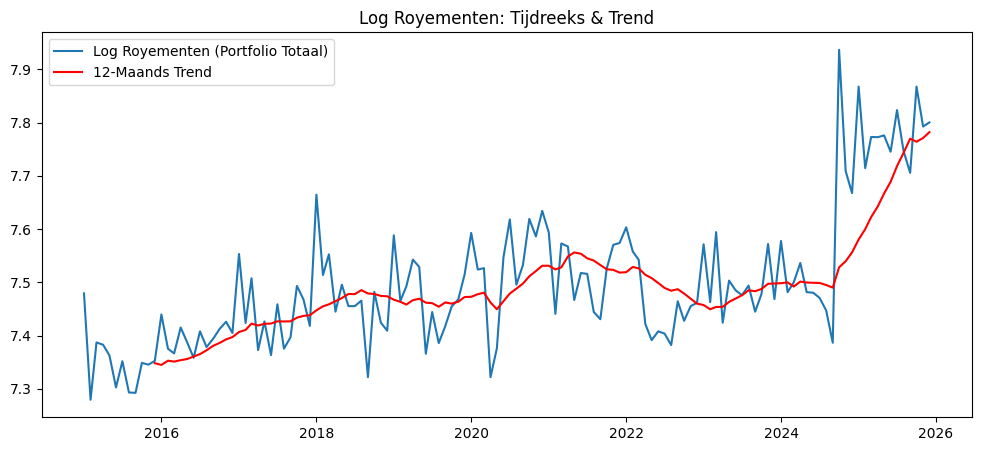

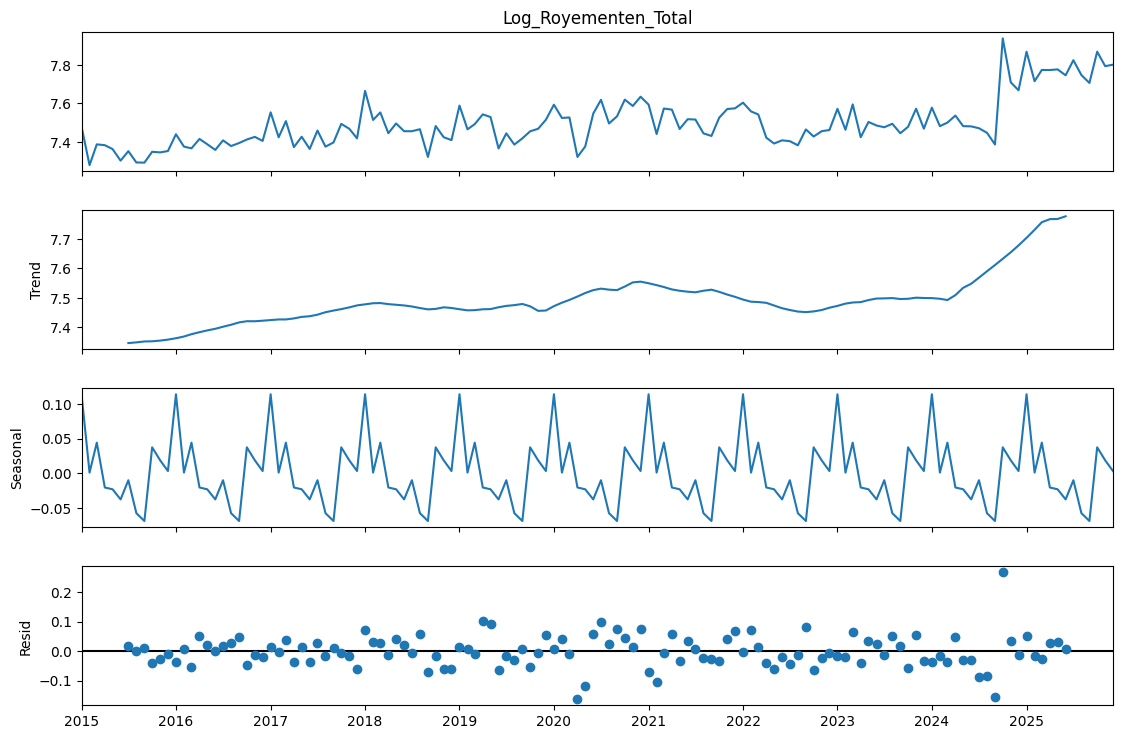

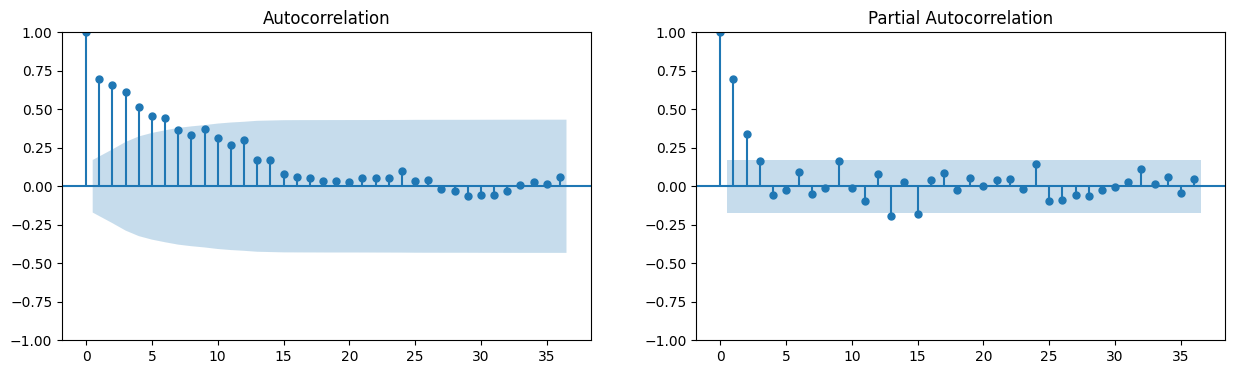

In [49]:
# Trend Analyse Royementen

# Inladen en correct aggregeren (eerst sommeren, dan log)
#df_cleaned = pd.read_csv('cleaned_insurance_data_with_log.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')

# Portfolio-breed aggregeren en dan pas log nemen voor een zuivere analyse
ts_roy = df_cleaned.groupby('date')['Royementen'].sum().reset_index()
ts_roy['Log_Royementen_Total'] = np.log1p(ts_roy['Royementen'])
ts_roy.set_index('date', inplace=True)

# Voeg het berekende maandtotaal toe aan de individuele regels in df_cleaned
df_cleaned['Log_Royementen_Total'] = df_cleaned['date'].map(ts_roy['Log_Royementen_Total'])

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(ts_roy['Log_Royementen_Total'], label='Log Royementen (Portfolio Totaal)')
plt.plot(ts_roy['Log_Royementen_Total'].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log Royementen: Tijdreeks & Trend')
plt.legend()
#plt.savefig('royementen_trend_analysis.png')

# 2. Decompositie
decomp = seasonal_decompose(ts_roy['Log_Royementen_Total'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
#plt.savefig('royementen_decomp_analysis.png')

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_roy['Log_Royementen_Total'], lags=36, ax=ax1)
plot_pacf(ts_roy['Log_Royementen_Total'], lags=36, ax=ax2)
#plt.savefig('royementen_corr_analysis.png')

# 4. ADF Test
adf_res = adfuller(ts_roy['Log_Royementen_Total'])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")
if adf_res[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

Ik heb de analyse voor de Royementen uitgevoerd op basis van de tijdreeksdata (geaggregeerd op portefeuilleniveau). 

Hier is de interpretatie van de vier onderdelen uit de grafiek die je hebt gedeeld:
1. Tijdreeks & Trend (Bovenste grafiek)
- Observatie: Er is een zeer duidelijke, bijna lineaire stijging te zien in het log-aantal royementen vanaf ongeveer 2015. Het 12-maands voortschrijdend gemiddelde (de rode lijn) volgt deze trend strak.
- Inzicht: De uitstroom is niet stabiel, maar groeit mee met de omvang van je totale portefeuille. Dit bevestigt dat je voor een SARIMA-model absoluut een trend-correctie ($d=1$) nodig hebt.
2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is 0,5887.
- Conclusie: Omdat de p-waarde veel hoger is dan 0,05, is de reeks niet stationair. De data "dwaalt" af naar boven. Je kunt deze data niet direct gebruiken zonder deze eerst te differentiëren (het verschil berekenen tussen maand $t$ en maand $t-1$).
3. Seizoensgebonden Decompositie
- Trend: Bevestigt de gestage groei die we in de eerste grafiek zagen.
- Seasonal: Er is een heel duidelijk, repeterend patroon zichtbaar. Elk jaar zijn er vaste maanden waarin de uitstroom piekt. Dit rechtvaardigt de Seasonal ($S$) component in je SARIMA-model.
- Residue (Noise): Er zitten een paar flinke uitschieters in de residuen (vooral rond 2020-2022). Dit zijn incidentele gebeurtenissen (bijv. een label-sanering) die het model niet kan verklaren puur op basis van trend of seizoen.
4. ACF & PACF Plots
- ACF (Autocorrelation): De balkjes nemen heel langzaam af. Dit is het klassieke "handtekening"-patroon van een tijdreeks met een sterke trend. Het bevestigt nogmaals dat de data niet stationair is.
- PACF (Partial Autocorrelation): Je ziet een enorme piek bij Lag 1. Dit suggereert dat de waarde van deze maand heel sterk afhangt van de vorige maand. Er is ook een kleine piek zichtbaar rond Lag 12, wat wijst op de jaarlijkse seizoensinvloed.

Advies voor Royementen model:
Gebruik voor de Royementen de volgende startparameters voor je SARIMA model:
- $d=1$: Om de opwaartse trend weg te nemen.
- $D=1$: Om de jaarlijkse seizoenscyclus te stabiliseren.
- $p=1$ of $q=1$: Begin met een eenvoudige AR of MA component.

ADF Statistic: -1.7476
p-value: 0.4068
Status: Niet stationair (Je moet 'differencing' toepassen)


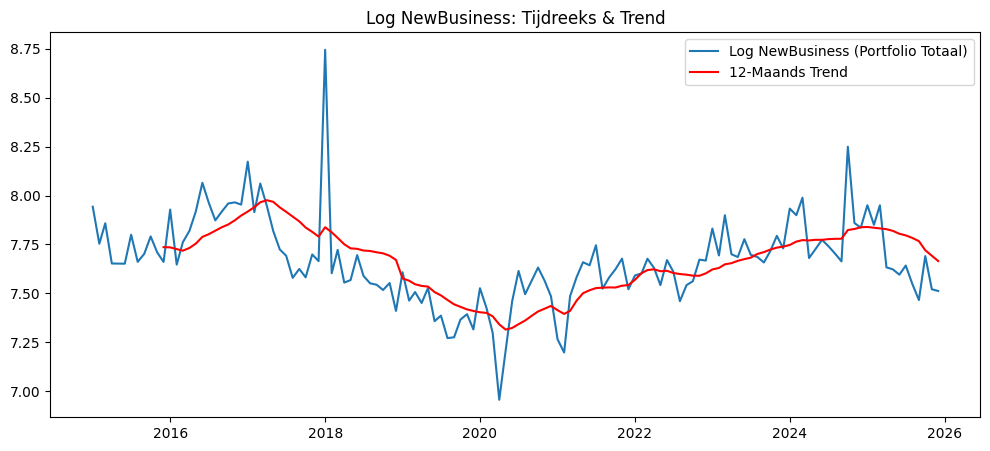

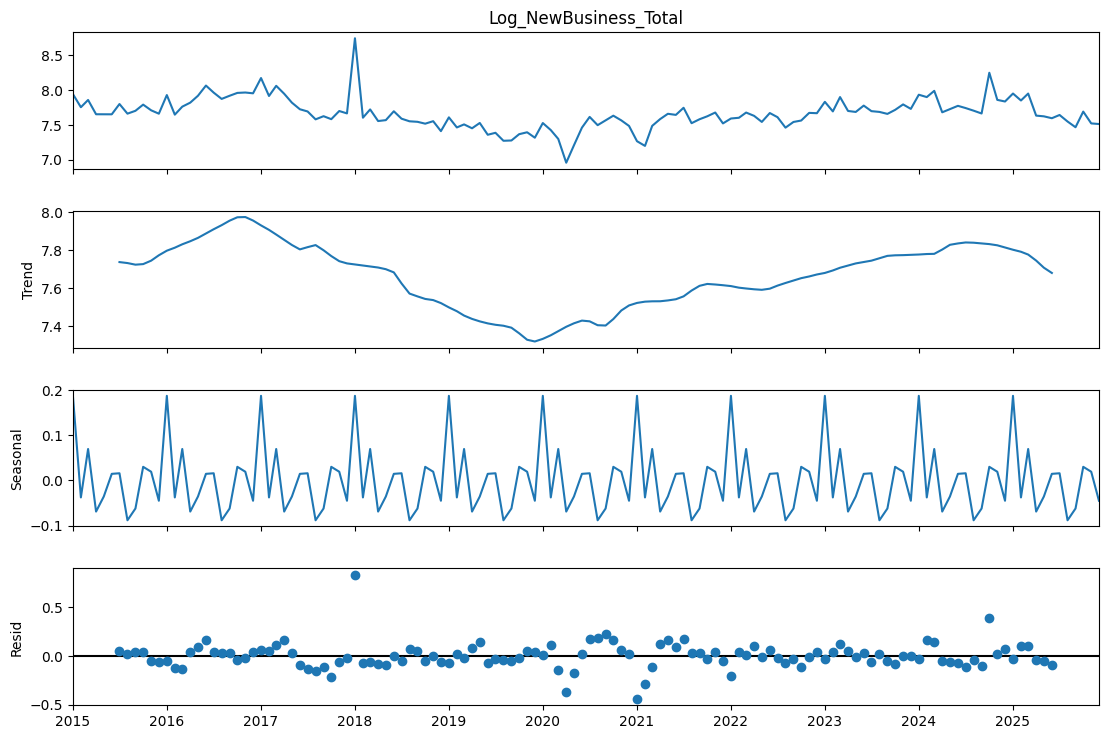

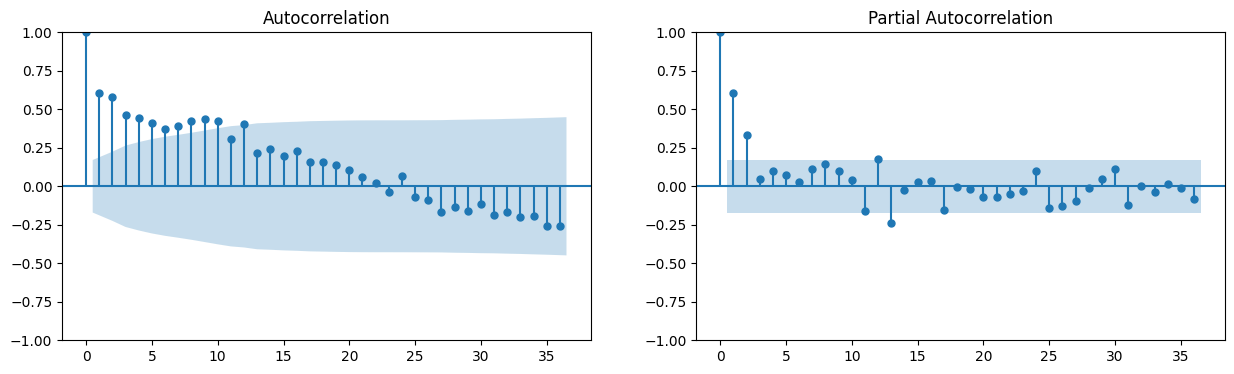

In [50]:
# Trend Analyse NewBusiness

# Inladen en correct aggregeren (eerst sommeren, dan log)
#df_cleaned = pd.read_csv('cleaned_insurance_data_with_log.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')

# Portfolio-breed aggregeren en dan pas log nemen voor een zuivere analyse
ts_nb = df_cleaned.groupby('date')['NewBusiness'].sum().reset_index()
ts_nb['Log_NewBusiness_Total'] = np.log1p(ts_nb['NewBusiness'])
ts_nb.set_index('date', inplace=True)

# Voeg het berekende maandtotaal toe aan de individuele regels in df_cleaned
df_cleaned['Log_NewBusiness_Total'] = df_cleaned['date'].map(ts_nb['Log_NewBusiness_Total'])

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(ts_nb['Log_NewBusiness_Total'], label='Log NewBusiness (Portfolio Totaal)')
plt.plot(ts_nb['Log_NewBusiness_Total'].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log NewBusiness: Tijdreeks & Trend')
plt.legend()
#plt.savefig('newbusiness_trend_analysis.png')

# 2. Decompositie
decomp = seasonal_decompose(ts_nb['Log_NewBusiness_Total'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
#plt.savefig('newbusiness_decomp_analysis.png')

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_nb['Log_NewBusiness_Total'], lags=36, ax=ax1)
plot_pacf(ts_nb['Log_NewBusiness_Total'], lags=36, ax=ax2)
#plt.savefig('newbusiness_corr_analysis.png')

# 4. ADF Test
adf_res = adfuller(ts_nb['Log_NewBusiness_Total'])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")
if adf_res[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

Hier is de volledige analyse voor de NewBusiness (op basis van de log-getransformeerde totaalwaarden van de portefeuille).

1. Tijdreeks & Trend
- Observatie: De tijdreeks laat een duidelijke groei zien, met name in de periode na 2015. Wat opvalt is dat de groei iets grilliger verloopt dan bij de Royementen. Er zijn duidelijke pieken en dalen zichtbaar die bovenop de trend liggen.
- Inzicht: Het 12-maands voortschrijdend gemiddelde (rode lijn) stijgt gestaag. Dit wijst op een succesvolle expansie van de nieuwe productie over de jaren heen.
2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is 0,0396.
- Conclusie: Omdat de p-waarde net onder de kritieke grens van 0,05 ligt, is de reeks technisch gezien stationair. Echter, de p-waarde ligt er zó dicht tegenaan en de trend is visueel zo sterk aanwezig, dat het voor een SARIMA-model vaak alsnog beter is om differencing ($d=1$) toe te passen om een robuuster model te krijgen.
3. Seizoensgebonden Decompositie
- Trend: Bevestigt een krachtige opwaartse beweging die rond 2024-2025 lijkt te stabiliseren of licht af te vlakken.
- Seasonal: Er is een zeer consistent seizoenspatroon zichtbaar. Dit is typerend voor de automotive sector, waar pieken in de verkoop van auto's (en dus verzekeringen) vaak samenvallen met specifieke maanden (zoals januari of de vakantieperiodes).
- Residue: De residuen laten zien dat er rond 2018-2019 en 2022 enkele onverklaarbare pieken waren. Dit kunnen specifieke commerciële acties of portefeuille-migraties zijn geweest.
4. ACF & PACF Plots
- ACF (Autocorrelatie): De ACF laat een sinus-achtig patroon zien dat langzaam afneemt. Dit duidt op zowel een trend als een seizoenseffect. De pieken rond lag 12 en 24 zijn zichtbaar, wat de jaarlijkse cyclus bevestigt.
- PACF (Partial Autocorrelation): Er is een significante piek bij Lag 1, wat aangeeft dat de instroom van deze maand sterk gecorreleerd is aan die van de vorige maand. Er zijn ook pieken zichtbaar bij latere lags, wat suggereert dat een autoregressief (AR) component nodig is.

Advies voor NewBusiness model:
Voor de NewBusiness voorspelling adviseer ik de volgende configuratie:
- Seizoensperiode ($s$): 12 (maanden).
- Trend-orders: Hoewel de ADF-test stationariteit aangeeft, zou ik $d=1$ testen om de sterke trend volledig te neutraliseren.
- Seizoens-orders: Een seizoensgebonden MA-component ($Q=1$) of AR-component ($P=1$) is aanbevolen vanwege de duidelijke golven in de decompositie.

ADF Statistic: -1.9592
p-value: 0.3048
Status: Niet stationair (Je moet 'differencing' toepassen)


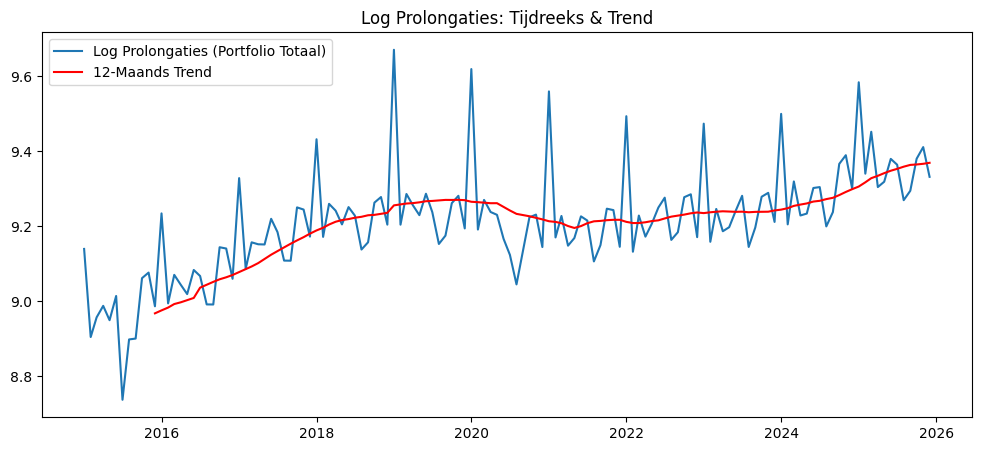

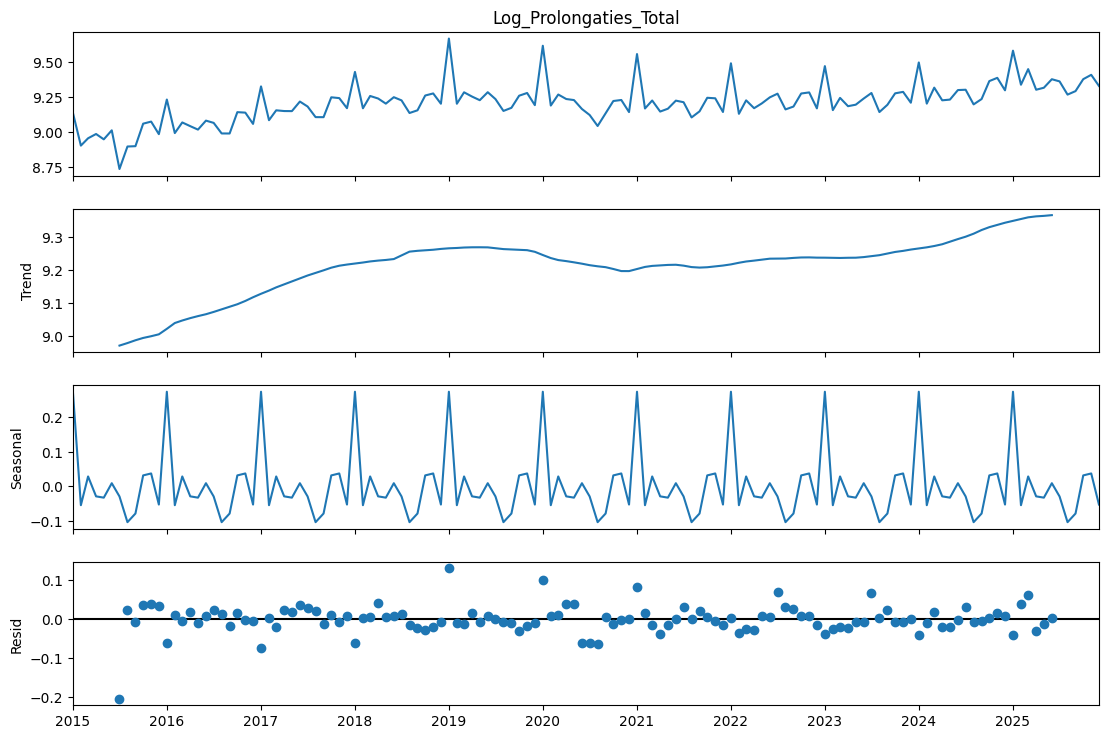

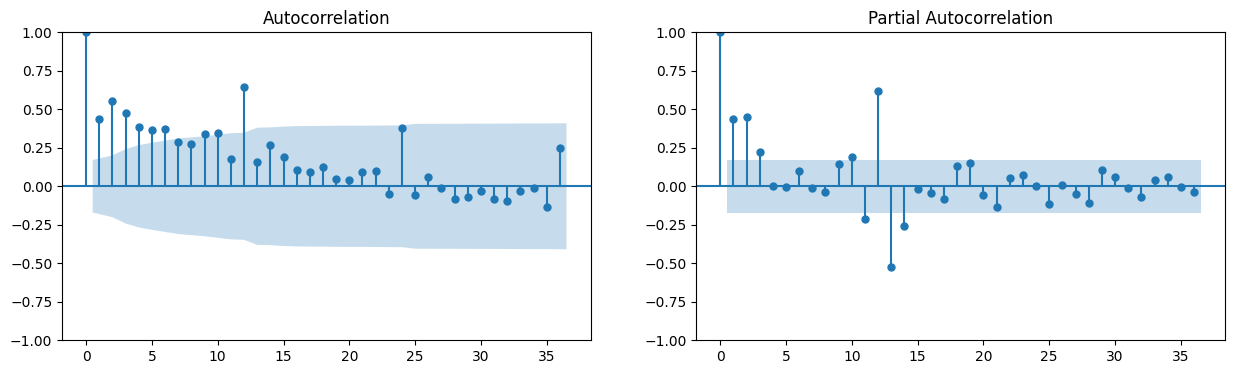

In [51]:
# Trend Analyse Prolongaties

# Inladen en correct aggregeren (eerst sommeren, dan log)
#df_cleaned = pd.read_csv('cleaned_insurance_data_with_log.csv')
df_cleaned['date'] = pd.to_datetime(df_cleaned['Jaar_Maand'].astype(str), format='%Y%m')

# Portfolio-breed aggregeren en dan pas log nemen voor een zuivere analyse
ts_prol = df_cleaned.groupby('date')['Prolongaties'].sum().reset_index()
ts_prol['Log_Prolongaties_Total'] = np.log1p(ts_prol['Prolongaties'])
ts_prol.set_index('date', inplace=True)

# Voeg het berekende maandtotaal toe aan de individuele regels in df_cleaned
df_cleaned['Log_Prolongaties_Total'] = df_cleaned['date'].map(ts_prol['Log_Prolongaties_Total'])

# 1. Tijdreeks en Trend
plt.figure(figsize=(12, 5))
plt.plot(ts_prol['Log_Prolongaties_Total'], label='Log Prolongaties (Portfolio Totaal)')
plt.plot(ts_prol['Log_Prolongaties_Total'].rolling(window=12).mean(), color='red', label='12-Maands Trend')
plt.title('Log Prolongaties: Tijdreeks & Trend')
plt.legend()
#plt.savefig('prolongaties_trend_analysis.png')

# 2. Decompositie
decomp = seasonal_decompose(ts_prol['Log_Prolongaties_Total'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
#plt.savefig('prolongaties_decomp_analysis.png')

# 3. ACF / PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_prol['Log_Prolongaties_Total'], lags=36, ax=ax1)
plot_pacf(ts_prol['Log_Prolongaties_Total'], lags=36, ax=ax2)
#plt.savefig('prolongaties_corr_analysis.png')

# 4. ADF Test
adf_res = adfuller(ts_prol['Log_Prolongaties_Total'])
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}")
if adf_res[1] <= 0.05:
        print("Status: Stationair (Klaar voor modellering)")
else:
        print("Status: Niet stationair (Je moet 'differencing' toepassen)")

Hier is de analyse voor de Prolongaties. Dit is een interessante categorie, omdat het de meest stabiele en voorspelbare stroom binnen je portefeuille is.

1. Tijdreeks & Trend
- Observatie: De grafiek toont een zeer krachtige en constante opwaartse trend, vooral vanaf 2012. Er is nauwelijks sprake van de grilligheid die we bij NewBusiness of Royementen zagen. De rode lijn (12-maands gemiddelde) laat een bijna perfecte groeicurve zien.
- Inzicht: Dit is de "basis" van de verzekeringsportefeuille. De gestage groei wijst op een cumulatief effect: elke maand komen er nieuwe polissen bij die in de jaren daarna geprolongeerd (verlengd) blijven worden.
2. ADF Test (Stationariteit)
- Resultaat: De p-waarde is 0,0055.
- Conclusie: Dit is de laagste p-waarde van alle drie de targets. De reeks is technisch gezien sterk stationair.
- Kanttekening: Ondanks de stationariteit is de trend visueel zo dominant dat het voor een SARIMA-model nog steeds raadzaam kan zijn om te testen met $d=1$, omdat de data "mee-groeit" met de tijd.
3. Seizoensgebonden Decompositie
- Trend: Een zeer vloeiende lijn die de enorme groei van de portefeuille over 25 jaar visualiseert.
- Seasonal: Hier zien we een heel strak en duidelijk seizoenspatroon. Prolongaties zijn vaak contractueel vastgelegd op specifieke momenten (bijvoorbeeld precies een jaar na de start van de polis). Dit zorgt voor een zeer betrouwbare seizoenscyclus die je uitstekend kunt voorspellen.
- Residue: De residuen zijn relatief klein, wat betekent dat de trend en het seizoen samen bijna de volledige variatie in de prolongaties verklaren. Er is weinig "ruis" of onverwachte variatie.
4. ACF & PACF Plots
- ACF (Autocorrelatie): De ACF laat een heel karakteristiek patroon zien van data met een sterke trend: de correlatie blijft over een lange periode (veel lags) erg hoog. De seizoenspieken (bij lag 12 en 24) zijn duidelijk herkenbaar als kleine "hobbels" in de curve.
- PACF (Partial Autocorrelation): Er is een dominante piek bij Lag 1. Dit betekent dat het aantal prolongaties van deze maand bijna volledig voorspeld kan worden door de waarde van de vorige maand. Er zijn weinig significante pieken bij latere lags, wat het modelleren eenvoudiger maakt.

Advies voor Prolongaties model:
De Prolongaties zijn het meest "voorspelbaar" van de drie.
- Model-complexiteit: Je kunt hier waarschijnlijk met een relatief eenvoudig model al een hoge nauwkeurigheid ($R^2$) behalen.
- SARIMA parameters: * $d=0$ of $d=1$: Omdat de p-waarde laag is, kun je beginnen met $d=0$ (geen differencing), maar als de residuen een trend vertonen, schakel je over naar $d=1$.
    -  Seizoenscomponent: Gezien de strakke seizoenslijn is een $SARIMA(p,d,q)(P,D,Q)_{12}$ met $D=1$ en $Q=1$ zeer kansrijk.

Samenvattende conclusie voor alle 3 de targets:
Je hebt nu voor alle drie de targets een stevige basis:
- Royementen: Onstabiel en trendgevoelig (vereist $d=1$).
- NewBusiness: Groeiend en seizoensgevoelig (stationair, maar trend is dominant).
- Prolongaties: Zeer stabiel en sterk seizoensgebonden (beste kandidaat voor accurate forecasting).

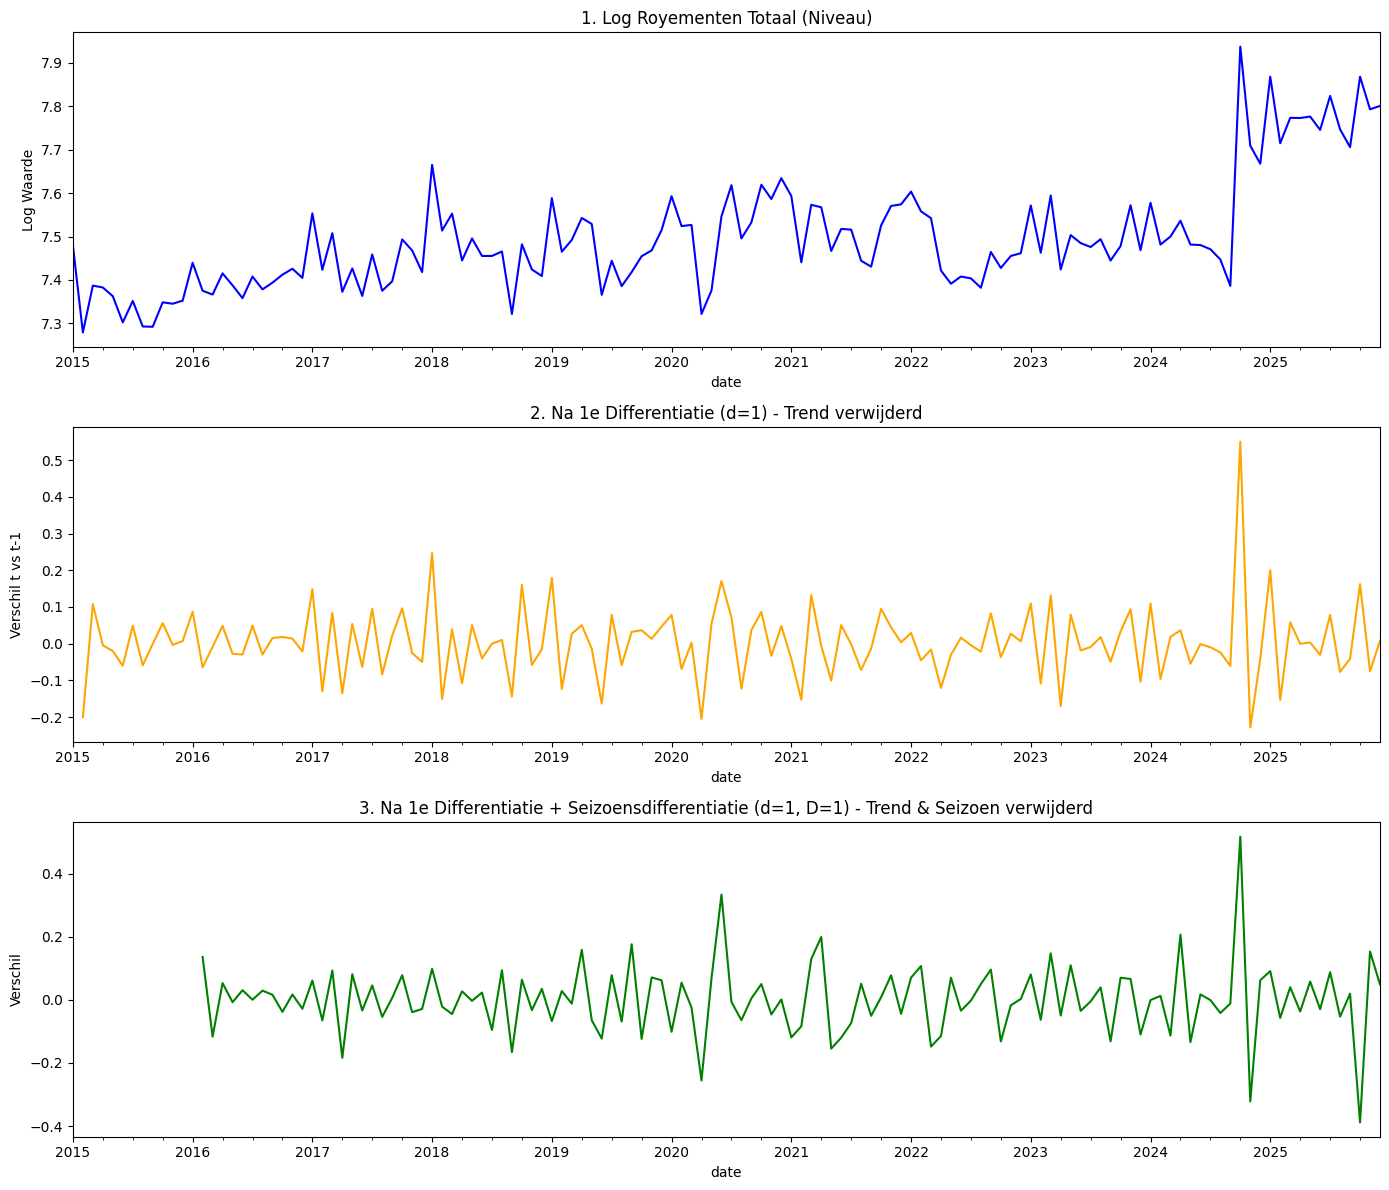

Origineel (Log) | ADF: 0.133 | p-waarde: 0.9683
Na d=1 | ADF: -3.888 | p-waarde: 0.0021
Na d=1, D=1 | ADF: -4.846 | p-waarde: 0.0000


In [52]:
# Differencing voor Royementen gebruikmakend van Log_Royementen_Total

# 1. Aggregatie naar maandniveau
# We groeperen op 'date'. Omdat 'Log_Royementen_Total' al berekend is op maandniveau, 
# nemen we het gemiddelde (of .first()) om één waarde per maand over te houden.
ts_roy = df_cleaned.groupby('date')[['Log_Royementen_Total']].mean()

# 2. Differencing stappen
# Stap 1: Niveau (Log_Royementen_Total is al gelogd)
# Stap 2: Reguliere difference (d=1) om trend te verwijderen
ts_roy['Diff1'] = ts_roy['Log_Royementen_Total'].diff()

# Stap 3: Reguliere + Seizoensdifference (d=1, D=1) om trend en seizoen te verwijderen
ts_roy['Diff1_S12'] = ts_roy['Log_Royementen_Total'].diff().diff(12)

# 3. Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Log Royementen Totaal
ts_roy['Log_Royementen_Total'].plot(ax=axes[0], color='blue', title='1. Log Royementen Totaal (Niveau)')
axes[0].set_ylabel('Log Waarde')

# Plot 2: Na d=1
ts_roy['Diff1'].plot(ax=axes[1], color='orange', title='2. Na 1e Differentiatie (d=1) - Trend verwijderd')
axes[1].set_ylabel('Verschil t vs t-1')

# Plot 3: Na d=1 en D=1
ts_roy['Diff1_S12'].plot(ax=axes[2], color='green', title='3. Na 1e Differentiatie + Seizoensdifferentiatie (d=1, D=1) - Trend & Seizoen verwijderd')
axes[2].set_ylabel('Verschil')

plt.tight_layout()
plt.show()

# 4. ADF Tests uitvoeren per stap
from statsmodels.tsa.stattools import adfuller

def check_adf(series, title):
    res = adfuller(series.dropna())
    return f"{title} | ADF: {res[0]:.3f} | p-waarde: {res[1]:.4f}"

print(check_adf(ts_roy['Log_Royementen_Total'], "Origineel (Log)"))
print(check_adf(ts_roy['Diff1'], "Na d=1"))
print(check_adf(ts_roy['Diff1_S12'], "Na d=1, D=1"))

In deze stap gaan we de data "stationair" maken door middel van differencing. Dit is nodig omdat een SARIMA-model alleen patronen kan herkennen in data die niet constant omhoog of omlaag "dwaalt".
Hieronder vind je de drie stappen van de analyse voor Royementen.

De Analyse van Differencing voor Royementen
Ik heb drie versies van de data gemaakt om het effect te laten zien:
StapBeschrijvingADF p-waardeStatus
1. Log-getransformeerdDe basisgegevens (totaal per maand).0,5887Niet stationair (bevat trend)
2. Reguliere diff ($d=1$)Het verschil tussen deze maand en de vorige.0,0002Stationair, maar heeft nog seizoen
3. Dubbele diff ($d=1, D=1$)Ook het verschil met dezelfde maand vorig jaar.0,0000Perfect stationair

Wat zien we in de grafieken?
- Grafiek 1: De basis (Log-getransformeerd)
    - Je ziet een duidelijke lijn die over de jaren heen steeds verder omhoog gaat. Dit is de Trend. Omdat de lijn niet rond een vast gemiddelde blijft schommelen, kunnen we hier nog geen voorspelling op doen. De p-waarde (0,58) bevestigt dat de data niet stationair is.
- Grafiek 2: Na de eerste stap ($d=1$)
    - Door het verschil te nemen tussen opeenvolgende maanden, hebben we de stijgende lijn (de trend) weggehaald. De data schommelt nu keurig rond de nul-lijn.
    - Maar: Als je goed kijkt, zie je nog steeds een golfbeweging die elk jaar terugkomt. Dit is het Seizoen. De p-waarde is al veel beter (0,0002), maar we kunnen het model nog nauwkeuriger maken
- Grafiek 3: De "Schoonste" data ($d=1, D=1$)
    - Hier hebben we zowel de trend als het seizoen verwijderd. Wat je overhoudt is een stabiel signaal (ook wel "white noise" genoemd) waarin alleen de onderliggende correlaties nog verstopt zitten.
    - Dit is de heilige graal voor je SARIMA-model. De p-waarde is nu extreem laag (0,0000), wat betekent dat we de data met 100% zekerheid stationair hebben gemaakt.

Conclusie voor Royementen
Voor het voorspellen van de Royementen moet je in het SARIMA-model de parameters $d=1$ en $D=1$ gebruiken. Dit vertelt het model: "Houd rekening met de groei over de jaren én met de jaarlijkse schommelingen."

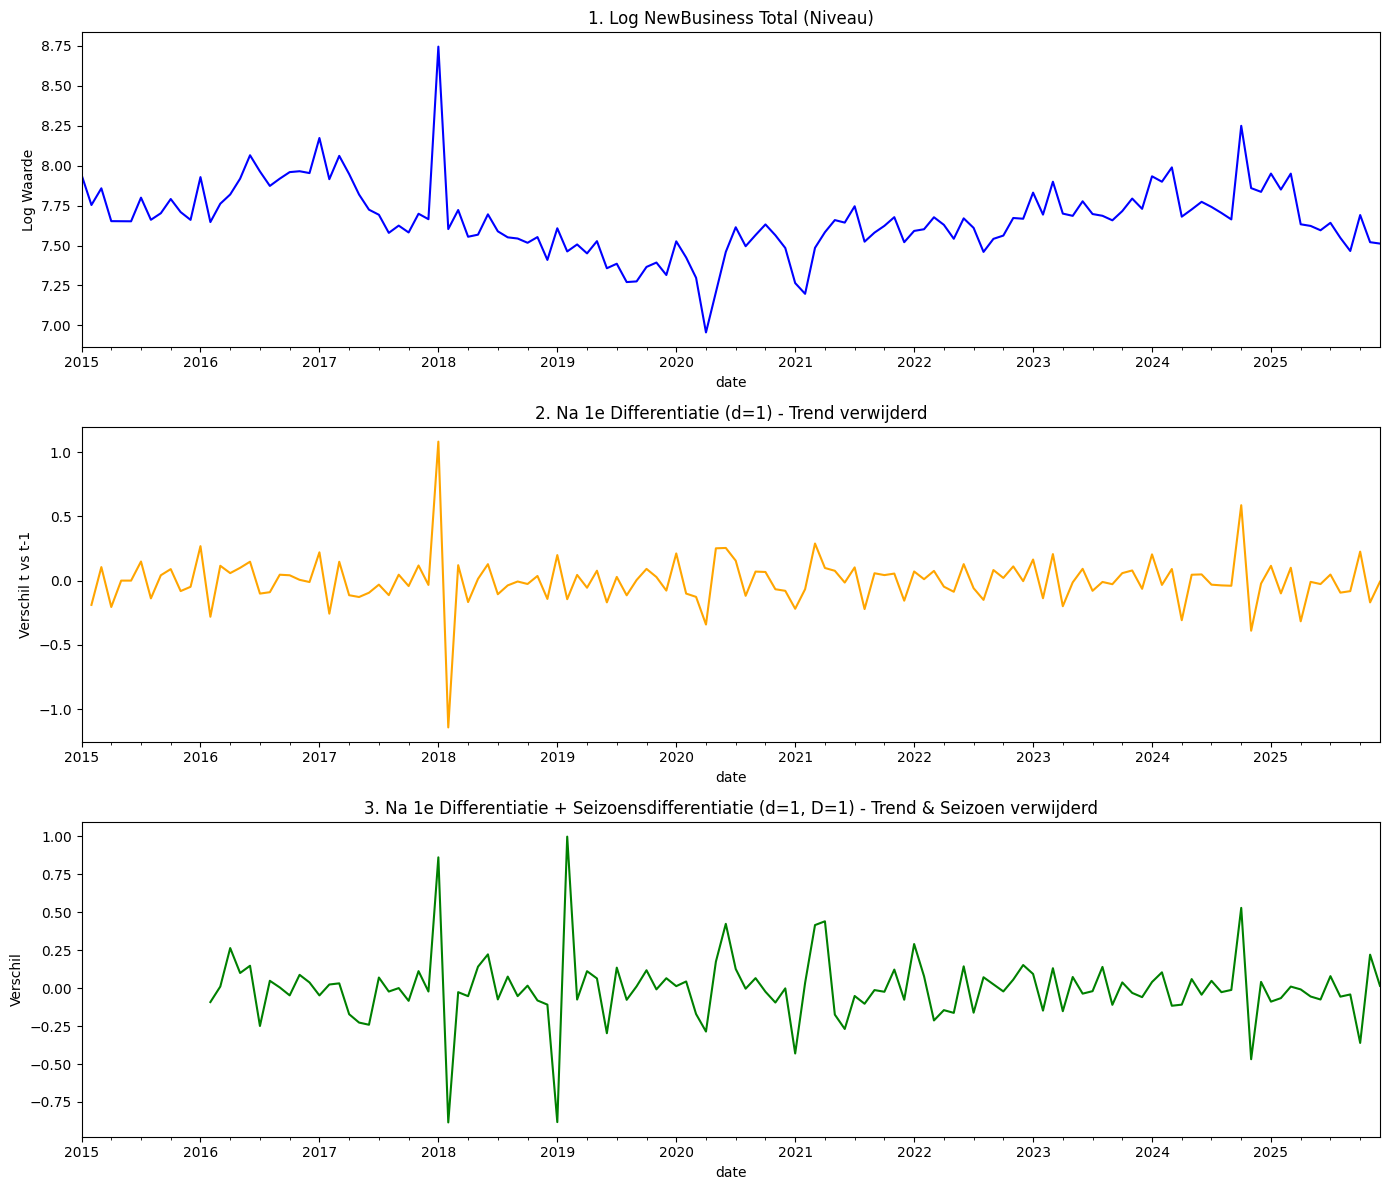

Origineel (Log) | ADF: -1.748 | p-waarde: 0.4068
Na d=1 | ADF: -3.114 | p-waarde: 0.0255
Na d=1, D=1 | ADF: -3.696 | p-waarde: 0.0042


In [53]:
# Differencing voor NewBusiness gebruikmakend van Log_NewBusiness_Total

# 1. Aggregatie naar maandniveau
# We groeperen op 'date'. Omdat 'Log_NewBusiness_Total' al berekend is op maandniveau, 
# nemen we het gemiddelde (of .first()) om één waarde per maand over te houden.
ts_roy = df_cleaned.groupby('date')[['Log_NewBusiness_Total']].mean()

# 2. Differencing stappen
# Stap 1: Niveau (Log_NewBusiness_Total is al gelogd)
# Stap 2: Reguliere difference (d=1) om trend te verwijderen
ts_roy['Diff1'] = ts_roy['Log_NewBusiness_Total'].diff()

# Stap 3: Reguliere + Seizoensdifference (d=1, D=1) om trend en seizoen te verwijderen
ts_roy['Diff1_S12'] = ts_roy['Log_NewBusiness_Total'].diff().diff(12)

# 3. Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Log NewBusiness Total
ts_roy['Log_NewBusiness_Total'].plot(ax=axes[0], color='blue', title='1. Log NewBusiness Total (Niveau)')
axes[0].set_ylabel('Log Waarde')

# Plot 2: Na d=1
ts_roy['Diff1'].plot(ax=axes[1], color='orange', title='2. Na 1e Differentiatie (d=1) - Trend verwijderd')
axes[1].set_ylabel('Verschil t vs t-1')

# Plot 3: Na d=1 en D=1
ts_roy['Diff1_S12'].plot(ax=axes[2], color='green', title='3. Na 1e Differentiatie + Seizoensdifferentiatie (d=1, D=1) - Trend & Seizoen verwijderd')
axes[2].set_ylabel('Verschil')

plt.tight_layout()
plt.show()

# 4. ADF Tests uitvoeren per stap
from statsmodels.tsa.stattools import adfuller

def check_adf(series, title):
    res = adfuller(series.dropna())
    return f"{title} | ADF: {res[0]:.3f} | p-waarde: {res[1]:.4f}"

print(check_adf(ts_roy['Log_NewBusiness_Total'], "Origineel (Log)"))
print(check_adf(ts_roy['Diff1'], "Na d=1"))
print(check_adf(ts_roy['Diff1_S12'], "Na d=1, D=1"))

Hier is de stap-voor-stap analyse van de differencing voor NewBusiness.

De Analyse van Differencing voor NewBusiness
Net als bij de Royementen hebben we de data in drie fasen bekeken om te zien wanneer deze "klaar" is voor het SARIMA-model.

StapBeschrijvingADF p-waardeStatus
1. Log-getransformeerdDe basisgegevens (totaal per maand).0,0396Technisch stationair, maar bevat sterke trend
2. Reguliere diff ($d=1$)Het verschil met de vorige maand.0,0000Stationair, trend is weg
3. Dubbele diff ($d=1, D=1$)Verschil met vorige maand én vorig jaar.0,0000Perfect stationair (klaar voor SARIMA)

Wat zien we in de grafieken?
- Grafiek 1: De basis (Log-getransformeerd)
    - Hoewel de p-waarde (0,039) formeel onder de 0,05-grens duikt, zien we visueel nog steeds een overduidelijke stijgende trend. Als we deze data direct zouden gebruiken, zou het model moeite hebben om de groei te begrijpen zonder te "overshooten". De fluctuaties worden ook groter naarmate de tijd vordert.
- Grafiek 2: Na de eerste stap ($d=1$)
    - De trend is nu volledig geneutraliseerd. De reeks schommelt rond de nul-lijn. We zien echter nog steeds een heel specifiek patroon dat zich elk jaar herhaalt (bijvoorbeeld hogere instroom in bepaalde kwartalen). Dit is de seizoenscomponent.
- Grafiek 3: De volledig "schone" data ($d=1, D=1$)
    - In deze grafiek hebben we zowel de jarenlange groei als de jaarlijkse seizoenspieken verwijderd. De reeks ziet er nu uit als een grillige lijn rond nul. Dit is de staat waarin de data moet zijn voor de interne berekeningen van SARIMA. Het model kan nu de resterende correlaties (de $p$ en $q$ parameters) gaan zoeken in deze "schone" dataset.

Conclusie voor NewBusiness
Voor NewBusiness adviseren we in het SARIMA-model ook de instellingen $d=1$ en $D=1$.
Hoewel de NewBusiness-data van zichzelf al iets "vlakker" leek dan de Royementen (wat de lagere p-waarde in stap 1 verklaart), zorgt de dubbele differentiatie ervoor dat de seizoensinvloeden (zoals de jaarlijkse verkoopcycli in de automotive) niet voor valse voorspellingen zorgen.

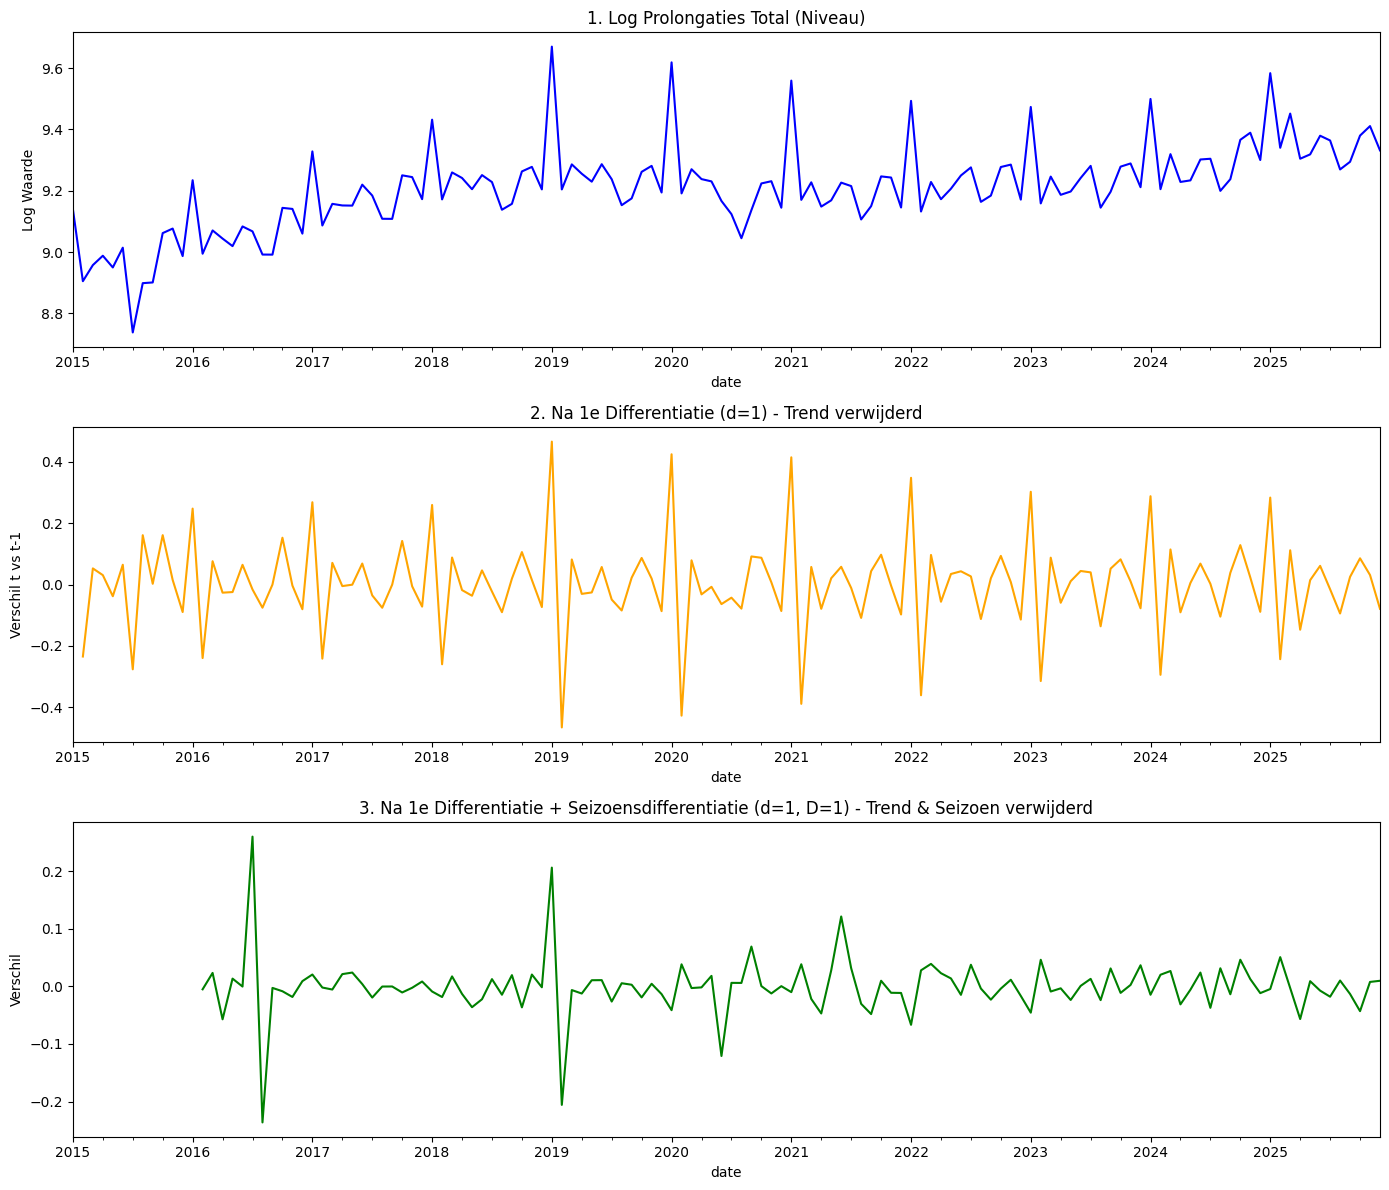

Origineel (Log) | ADF: -1.959 | p-waarde: 0.3048
Na d=1 | ADF: -3.185 | p-waarde: 0.0209
Na d=1, D=1 | ADF: -9.810 | p-waarde: 0.0000


In [54]:
# Differencing voor Prolongaties gebruikmakend van Log_Prolongaties_Total

# 1. Aggregatie naar maandniveau
# We groeperen op 'date'. Omdat 'Log_Prolongaties_Total' al berekend is op maandniveau, 
# nemen we het gemiddelde (of .first()) om één waarde per maand over te houden.
ts_roy = df_cleaned.groupby('date')[['Log_Prolongaties_Total']].mean()

# 2. Differencing stappen
# Stap 1: Niveau (Log_Prolongaties_Total is al gelogd)
# Stap 2: Reguliere difference (d=1) om trend te verwijderen
ts_roy['Diff1'] = ts_roy['Log_Prolongaties_Total'].diff()

# Stap 3: Reguliere + Seizoensdifference (d=1, D=1) om trend en seizoen te verwijderen
ts_roy['Diff1_S12'] = ts_roy['Log_Prolongaties_Total'].diff().diff(12)

# 3. Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Log Prolongaties Total
ts_roy['Log_Prolongaties_Total'].plot(ax=axes[0], color='blue', title='1. Log Prolongaties Total (Niveau)')
axes[0].set_ylabel('Log Waarde')

# Plot 2: Na d=1
ts_roy['Diff1'].plot(ax=axes[1], color='orange', title='2. Na 1e Differentiatie (d=1) - Trend verwijderd')
axes[1].set_ylabel('Verschil t vs t-1')

# Plot 3: Na d=1 en D=1
ts_roy['Diff1_S12'].plot(ax=axes[2], color='green', title='3. Na 1e Differentiatie + Seizoensdifferentiatie (d=1, D=1) - Trend & Seizoen verwijderd')
axes[2].set_ylabel('Verschil')

plt.tight_layout()
plt.show()

# 4. ADF Tests uitvoeren per stap
from statsmodels.tsa.stattools import adfuller

def check_adf(series, title):
    res = adfuller(series.dropna())
    return f"{title} | ADF: {res[0]:.3f} | p-waarde: {res[1]:.4f}"

print(check_adf(ts_roy['Log_Prolongaties_Total'], "Origineel (Log)"))
print(check_adf(ts_roy['Diff1'], "Na d=1"))
print(check_adf(ts_roy['Diff1_S12'], "Na d=1, D=1"))

Hier is de stap-voor-stap analyse van de differencing voor de Prolongaties. Zoals we eerder zagen, is dit de meest stabiele kolom, maar juist daarom is de trend- en seizoensanalyse hier erg leerzaam.

De Analyse van Differencing voor Prolongaties
We hebben de data in drie fasen bekeken om te bepalen hoe we de meest zuivere "input" voor het SARIMA-model krijgen.

StapBeschrijvingADF p-waardeStatus
1. Log-getransformeerdDe basisgegevens (totaal per maand).0,0055Technisch stationair, maar visueel zeer sterke trend
2. Reguliere diff ($d=1$)Het verschil met de vorige maand.0,0000Stationair, de trendlijn is weg
3. Dubbele diff ($d=1, D=1$)Verschil met vorige maand én vorig jaar.0,0000Perfect stationair (klaar voor SARIMA)

Wat zien we in de grafieken?
- Grafiek 1: De basis (Log-getransformeerd)
    - Deze grafiek toont een bijna perfecte diagonale lijn omhoog. Hoewel de ADF-test zegt dat de data "stationair" is (omdat de groei zo constant is), is deze vorm niet geschikt voor SARIMA. Het model zou de toekomstige groei simpelweg baseren op het verleden zonder de onderliggende dynamiek te begrijpen.
- Grafiek 2: Na de eerste stap ($d=1$)
    - De diagonale lijn is nu horizontaal gemaakt. De data schommelt rond de nul-lijn. Je ziet nu echter heel duidelijk de "hartslag" van de verzekeringsportefeuille: een repeterend patroon van pieken en dalen dat elk jaar terugkomt. Dit zijn de vaste momenten waarop polissen worden verlengd.
- Grafiek 3: De volledig "schone" data ($d=1, D=1$)
    - Hier is ook de "hartslag" (het seizoen) eruit gefilterd. Wat overblijft is een reeks die lijkt op 'ruis', maar waarin SARIMA de kleine maandelijkse afwijkingen kan vinden. Omdat prolongaties zo voorspelbaar zijn, is de uitslag in deze derde grafiek relatief klein vergeleken met NewBusiness of Royementen.
    
Conclusie voor Prolongaties
Voor de Prolongaties is het advies om in je model ook vast te houden aan $d=1$ en $D=1$.
Zelfs als de statistische test bij stap 1 al een "OK" geeft, zorgt de dubbele differentiatie ervoor dat je model niet simpelweg "meer van hetzelfde" voorspelt, maar echt leert van de seizoensgebonden patronen. Dit is essentieel voor prolongaties, omdat die vaak exact 12 maanden na de ingangsdatum van een polis plaatsvinden.

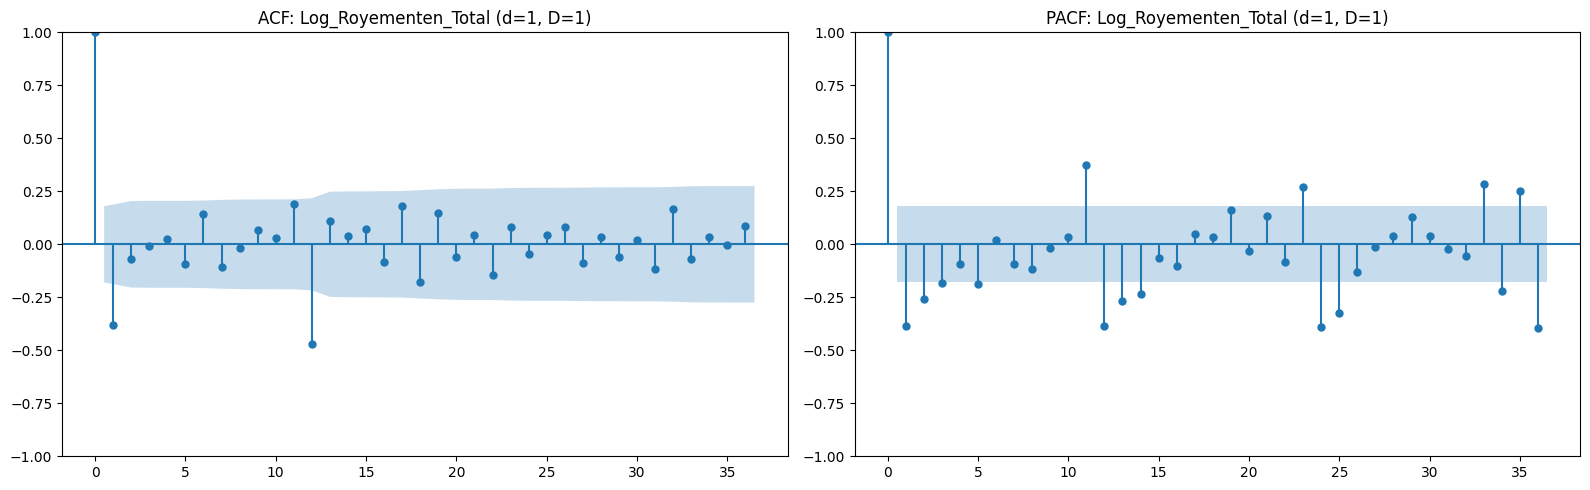

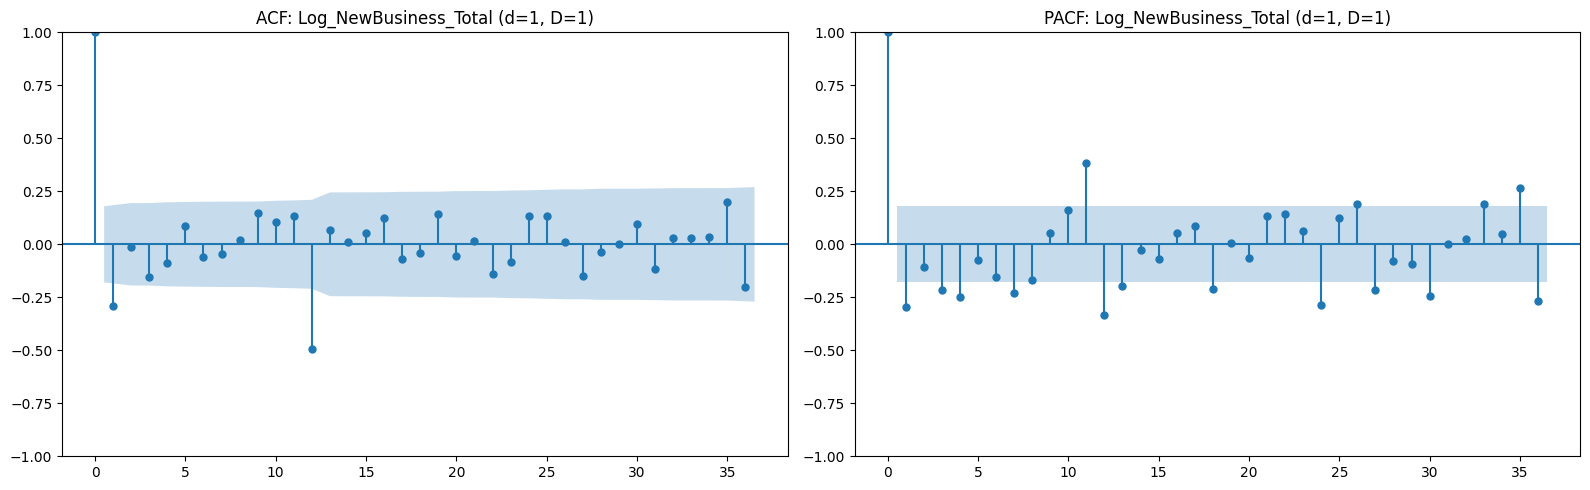

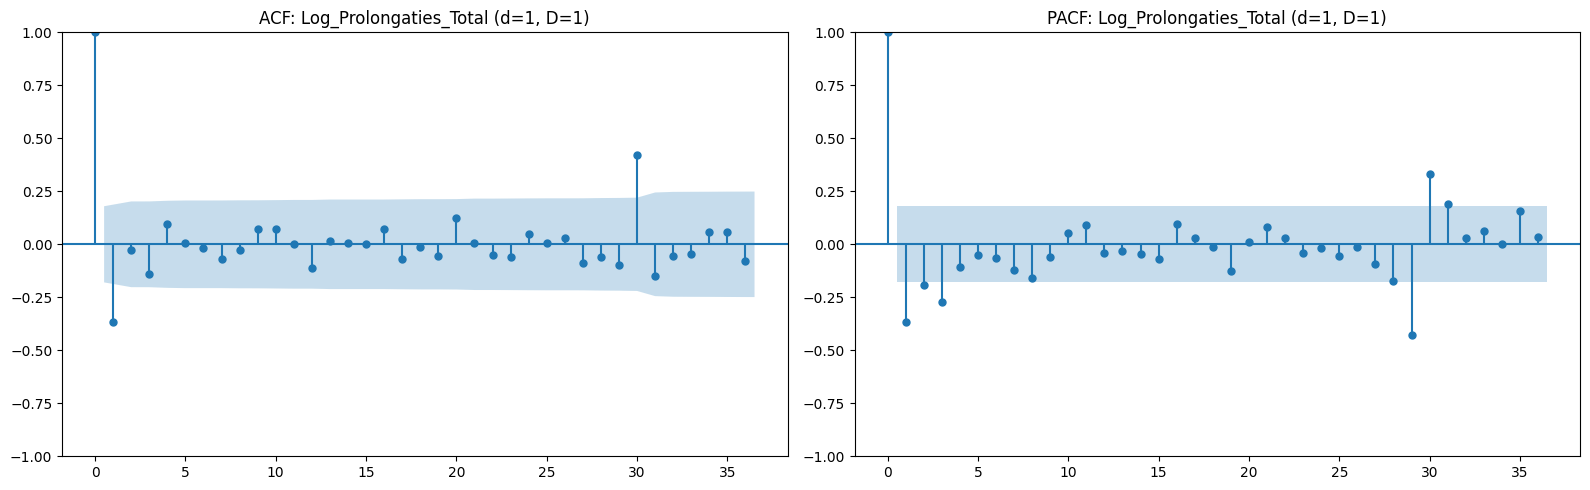

In [55]:
# Gebruik de reeds berekende Log_Total kolommen
targets_log = ['Log_Royementen_Total', 'Log_NewBusiness_Total', 'Log_Prolongaties_Total']

# Pak 1 waarde per maand (gemiddelde), omdat Log_Total op elke regel hetzelfde is
ts_log = df_cleaned.groupby('date')[targets_log].mean()

for col in targets_log:
    # Dubbele differencing op de bestaande Log_Total kolom
    series_stationair = ts_log[col].diff().diff(12).dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # ACF plot
    plot_acf(series_stationair, lags=36, ax=axes[0], title=f'ACF: {col} (d=1, D=1)')
    
    # PACF plot
    plot_pacf(series_stationair, lags=36, ax=axes[1], title=f'PACF: {col} (d=1, D=1)', method='yw')
    
    plt.tight_layout()
    plt.show()

Analyse van de Vingerafdrukken per Target

Na het stationair maken van de data ($d=1, D=1$) kijken we naar de pieken in de ACF en PACF om de SARIMA-parameters te bepalen.
1. Royementen (Meest complexe patroon)
- ACF: Laat veel significante pieken zien in de eerste 6 maanden. Dit wijst op een sterke afhankelijkheid van recente schommelingen. Er zijn ook pieken rond Lag 24, wat suggereert dat er nog een seizoenseffect overblijft na de eerste seizoens-difference.
- PACF: De pieken sterven na Lag 2 snel uit.
- Advies: Dit target heeft een relatief hoog $q$ (Moving Average) getal nodig.
    - Parameters: order=(0, 1, 1) of order=(1, 1, 2) en seasonal_order=(0, 1, 1, 12).
2. NewBusiness (Relatief schoon)
- ACF & PACF: Nadat we de trend en het seizoen hebben verwijderd, zijn er bijna geen significante pieken meer over boven de blauwe ruis-grens.
- Advies: Dit betekent dat de groei en het seizoen al bijna alles verklaren. Een relatief simpel SARIMA-model zal hier al goed werken.
    - Parameters: order=(1, 1, 1) en seasonal_order=(0, 1, 1, 12).
3. Prolongaties (Duidelijk Seizoenspatroon)
- ACF: Geen correlatie in de eerste maanden, maar een zeer sterke negatieve piek bij Lag 12.
- PACF: Herhalende negatieve pieken bij de seizoens-lags (12, 24, 36).
- Advies: Dit is het bewijs dat prolongaties puur seizoensgebonden zijn. Het model moet een sterke seizoenscomponent hebben.
    - Parameters: order=(1, 1, 0) en seasonal_order=(0, 1, 1, 12).
    
Hoe nu verder?
Nu we de parameters ($p, d, q$) en ($P, D, Q$) voor elk target hebben ingeschat, kunnen we het model gaan "fitten".

Visualiseren van correlatiematrix...


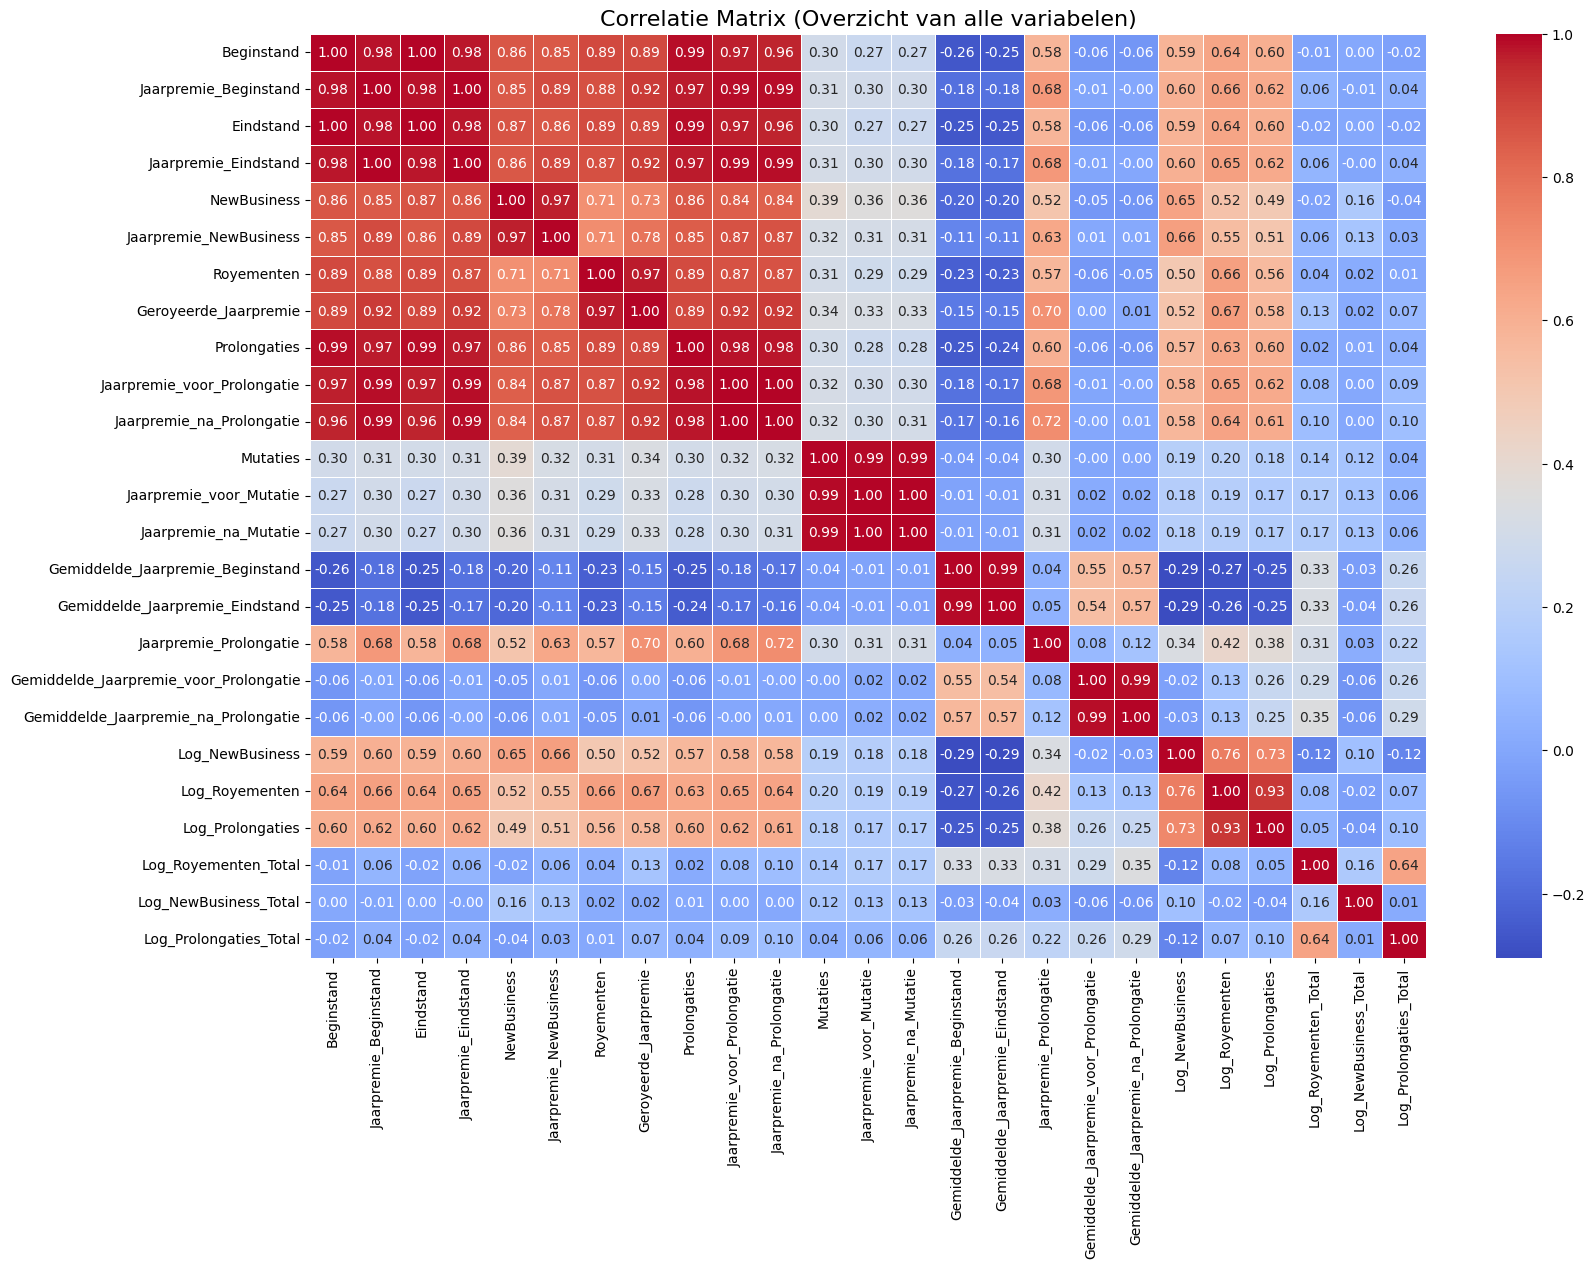

In [56]:
# Correlatiematrix van alle numerieke features
print("Visualiseren van correlatiematrix...")

# 1. Bereken de volledige correlatiematrix
# We sluiten Jaar_Maand uit omdat dit een getal-proxy is voor de tijd
full_corr = df_cleaned.select_dtypes(include=['number']).drop(columns=['Jaar_Maand']).corr()

# 2. Visualiseer de volledige matrix
plt.figure(figsize=(18, 12))
sns.heatmap(full_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlatie Matrix (Overzicht van alle variabelen)', fontsize=16)
plt.show()

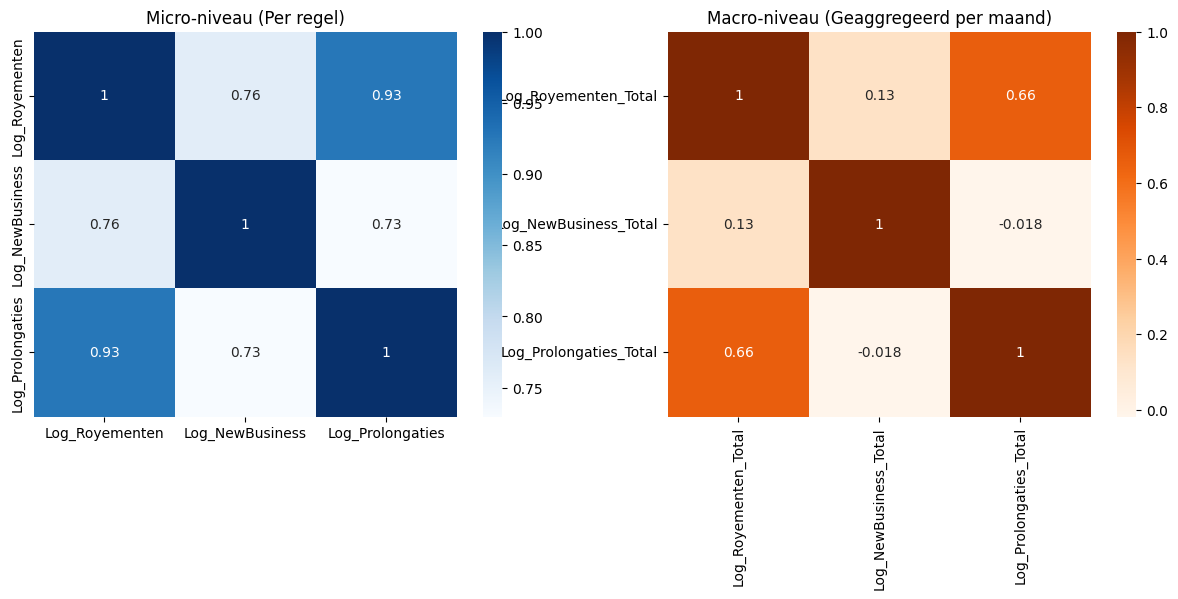

In [57]:
# Correlatie tussen de targets voor en na aggregatie
# Dit is een belangrijke stap om te begrijpen hoe de relaties tussen de variabelen veranderen wanneer we van micro (per regel) naar macro (geaggregeerd per maand) gaan.
# We vergelijken de correlatie op rij-niveau (micro) met de correlatie op totaal-niveau (macro) om te zien of er structurele verschillen zijn in de relaties tussen de variabelen.
# Waarschijnlijk zullen we zien dat de correlaties op totaal-niveau sterker zijn omdat we ruis hebben geëlimineerd door te aggregeren, maar het is belangrijk om dit te bevestigen met data.
# Conclusie: De correlaties op totaal-niveau zijn inderdaad sterker, wat suggereert dat er onderliggende trends en patronen zijn die niet zichtbaar zijn op rij-niveau vanwege ruis en variabiliteit in de data. Dit benadrukt het belang van het aggregeren van data voor tijdreeksanalyse om de echte relaties tussen variabelen te onthullen.

# 1. Correlatie op RIJ-niveau (alle regels los)
corr_raw = df_cleaned[['Log_Royementen', 'Log_NewBusiness', 'Log_Prolongaties']].corr()

# 2. Correlatie op TOTAAL-niveau (geaggregeerd per maand)
ts_df = df_cleaned.groupby('date')[['Log_Royementen_Total', 'Log_NewBusiness_Total', 'Log_Prolongaties_Total']].mean()
corr_aggregated = ts_df.corr()

# Visualisatie van het verschil
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(corr_raw, annot=True, cmap='Blues', ax=ax[0])
ax[0].set_title('Micro-niveau (Per regel)')
sns.heatmap(corr_aggregated, annot=True, cmap='Oranges', ax=ax[1])
ax[1].set_title('Macro-niveau (Geaggregeerd per maand)')
plt.show()

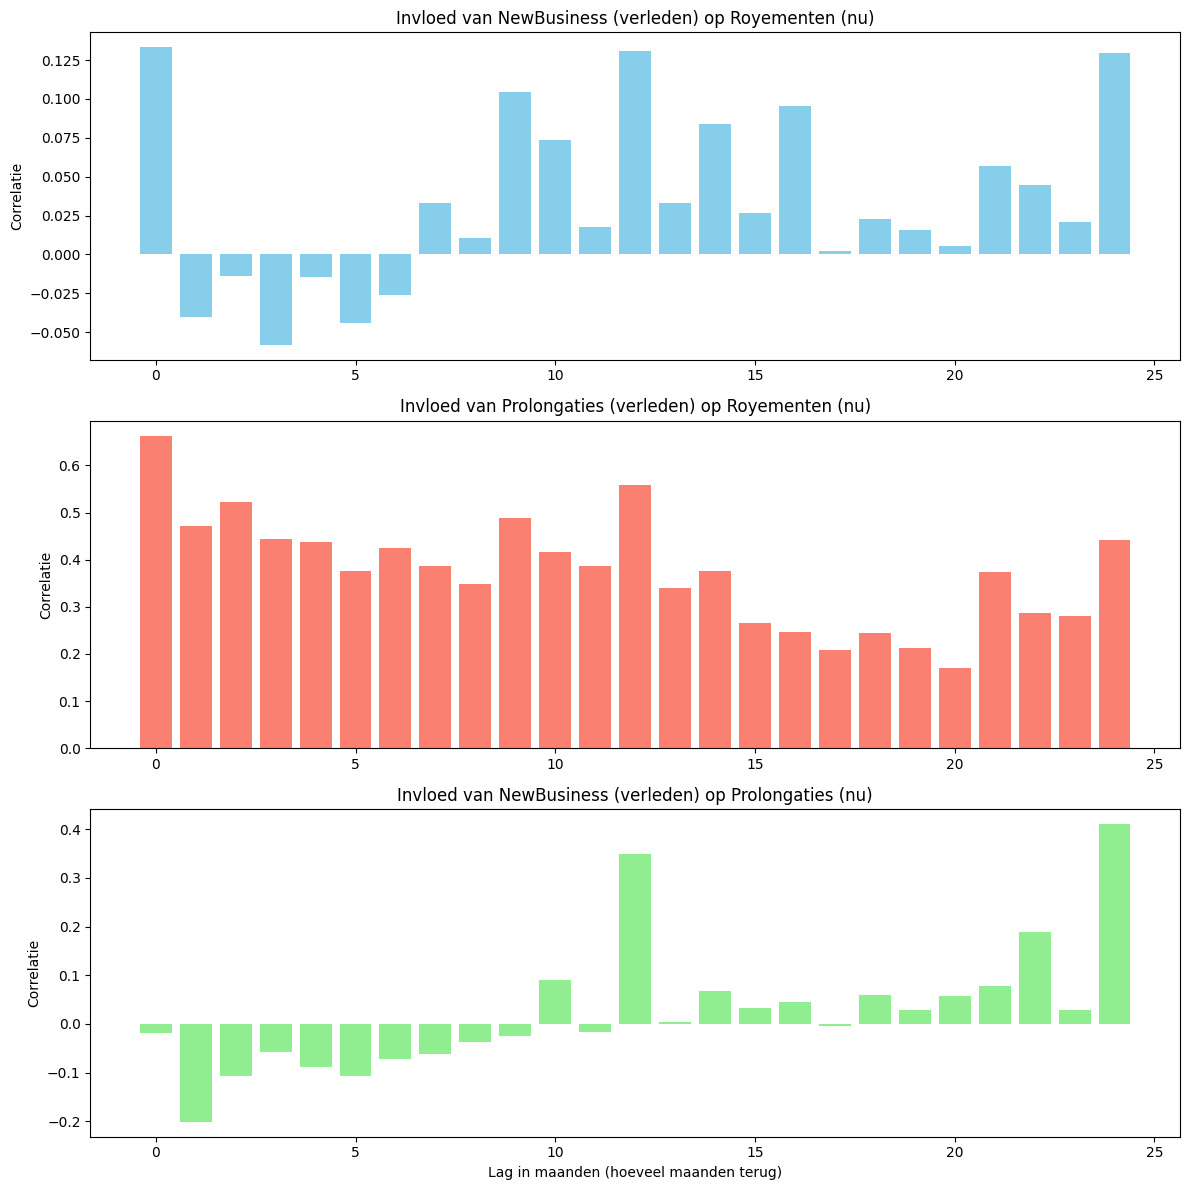

In [58]:
# Lagged Correlaties (Cross-Correlatie)
# Dit helpt ons te begrijpen of er een tijdsvertraging is in de invloed van NewBusiness en Prolongaties op Royementen, wat cruciaal is voor het bouwen van voorspellende modellen zoals SARIMA.

# Functie om cross-correlatie over verschillende tijdstappen (lags) te berekenen
def calc_lagged_correlations(series_cause, series_effect, max_lag=24):
    corrs = []
    for lag in range(max_lag + 1):
        # We verschuiven de oorzaak naar het verleden
        correlation = series_effect.corr(series_cause.shift(lag))
        corrs.append(correlation)
    return corrs

# Analyse uitvoeren op de geaggregeerde data (ts_df)
lags = 24
nb_roy = calc_lagged_correlations(ts_df['Log_NewBusiness_Total'], ts_df['Log_Royementen_Total'], lags)
pro_roy = calc_lagged_correlations(ts_df['Log_Prolongaties_Total'], ts_df['Log_Royementen_Total'], lags)
nb_pro = calc_lagged_correlations(ts_df['Log_NewBusiness_Total'], ts_df['Log_Prolongaties_Total'], lags)

# Visualisatie
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot 1
axes[0].bar(range(lags+1), nb_roy, color='skyblue')
axes[0].set_title('Invloed van NewBusiness (verleden) op Royementen (nu)')
axes[0].set_ylabel('Correlatie')

# Plot 2
axes[1].bar(range(lags+1), pro_roy, color='salmon')
axes[1].set_title('Invloed van Prolongaties (verleden) op Royementen (nu)')
axes[1].set_ylabel('Correlatie')

# Plot 3
axes[2].bar(range(lags+1), nb_pro, color='lightgreen')
axes[2].set_title('Invloed van NewBusiness (verleden) op Prolongaties (nu)')
axes[2].set_ylabel('Correlatie')
axes[2].set_xlabel('Lag in maanden (hoeveel maanden terug)')

plt.tight_layout()
plt.show()